# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [288]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection  import train_test_split

from scipy.stats import zscore

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [289]:
#mouting drive unit
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [290]:
# Loading the dataset - also creating a backup-copy of the original data
data = pd.read_csv("/content/drive/MyDrive/Study/MDS_UTexas/7_Unsupervised Learning/Trade&Ahead_project/stock_data.csv")

#creating a copy of the data
df=data.copy()

## Data Overview

- Observations
- Sanity checks

### Displaying the first and last 5 rows of the dataset

In [291]:
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [292]:
df.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

### Understand the shape of the dataset.

In [293]:
print("data set observations:",df.shape)

data set observations: (340, 15)


* There are 340 observations and 15 columns in the dataset

### Check the data types of the columns for the dataset.

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observations-**
* First 4 columns are object as expected
* The remaining columns(from 5 to 15) are numeric, so we are ok.
* Initially, doesn't seem to be missing values as per the Non-Null count, further checks will be performed

### Summary of the dataset.

In [295]:
df.describe()

Current Price  Price Change  Volatility         ROE  Cash Ratio  \
count     340.000000    340.000000  340.000000  340.000000  340.000000   
mean       80.862345      4.078194    1.525976   39.597059   70.023529   
std        98.055086     12.006338    0.591798   96.547538   90.421331   
min         4.500000    -47.129693    0.733163    1.000000    0.000000   
25%        38.555000     -0.939484    1.134878    9.750000   18.000000   
50%        59.705000      4.819505    1.385593   15.000000   47.000000   
75%        92.880001     10.695493    1.695549   27.000000   99.000000   
max      1274.949951     55.051683    4.580042  917.000000  958.000000   

       Net Cash Flow    Net Income  Earnings Per Share  \
count   3.400000e+02  3.400000e+02          340.000000   
mean    5.553762e+07  1.494385e+09            2.776662   
std     1.946365e+09  3.940150e+09            6.587779   
min    -1.120800e+10 -2.352800e+10          -61.200000   
25%    -1.939065e+08  3.523012e+08            1.557500   
50%     2.098000e+06  7.073360e+08            2.895000   
75%     1.698108e+08  1.899000e+09            4.620000   
max     2.076400e+10  2.444200e+10           50.090000   

       Estimated Shares Outstanding   P/E Ratio   P/B Ratio  
count                  3.400000e+02  340.000000  340.000000  
mean                   5.770283e+08   32.612563   -1.718249  
std                    8.458496e+08   44.348731   13.966912  
min                    2.767216e+07    2.935451  -76.119077  
25%                    1.588482e+08   15.044653   -4.352056  
50%                    3.096751e+08   20.819876   -1.067170  
75%                    5.731175e+08   31.764755    3.917066  
max                    6.159292e+09  528.039074  129.064585

**Observations-**
* Current price mean is ~80 and median ~60 which suggest a slightly right skewed distribution for this variable. On the other hand a big difference between the 3rd quartile and the max is observed which suggests some outliers at the upper whisker.
* Price change: as per mean, median it suggests a evenly distributed data around the mean. Min and Max suggest a balance between negative price change and postive price change ranging between ~-50% and ~+50%
* Volatility seems to be normal distributed with some high values. High values might mean high variance where stock price can have drastic/sudden changes in its value.
* ROE mean and median suggests a right skewed distribution at some scale. Very low values means company is not generating a good profit. We can observe some outliers at the upper whisker side observing a big variance between 3rd quartile value and max value.
* Cash ratio suggest a righ skewed distribution. Very low values as min=0 wouls suggest a risk of of not cover its short-term liabilities due a lack of cash/equivalents.
Net cash-flow: negative values would suggest having more outflows than inflows and a risk of cashflow deficit or liquidity concerns.
* Net income: we can observe negative values which would mean net loss where total expenses exceed revenues.
* earnings per share: normally distributed around the mean. Negative values would mean loss per share.
*P/E ratio: right skewed distributed as per mean/median. Low values would mean that investors are not keen to pay to much in relation to the company earnings per share.
* P/B ratio: we can observe that nearly 50% of the observations have negative values which would mean that company's liabilities exceed its assets, resulting in a negative net worth, other scenarios might be sustained losses, significant write-downs, or other financial difficulties

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. **What does the distribution of stock prices look like?**
Current price has a right skewed distribution with several outliers at the upper whisker. At least 75% of the observations have a stock price that ranges from 4.5 to ~93. Analysis performed using boxplots and KDEs below
2. **The stocks of which economic sector have seen the maximum price increase on average?** Health Care is the sector with higher average of stock price change with a value of 9.58
3. **How are the different variables correlated with each other?** This is answered after the bivariate analysis
4. **Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?** Cash Ratio mean by sector ranges from 13.6 to 149.81 where Utilities has the lowest mean value and Information technology has the highest value followed by Telecomunications and Health Care.
5. **P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?** P/E Ratio mean by sector ranges from 12.2 to 72.89 where Telecomunications has the lowest mean value and Energy has the highest value followed by Information Technology and Real Estate.

### Answering above questions with below calculations!

In [296]:
#Stock price average by GICS Sector
display(df.groupby(['GICS Sector'])[['Price Change']].mean())

Price Change
GICS Sector                              
Consumer Discretionary           5.846093
Consumer Staples                 8.684750
Energy                         -10.228289
Financials                       3.865406
Health Care                      9.585652
Industrials                      2.833127
Information Technology           7.217476
Materials                        5.589738
Real Estate                      6.205548
Telecommunications Services      6.956980
Utilities                        0.803657

In [297]:
#Cash ratio average by GICS Sector
df.groupby(['GICS Sector'])['Cash Ratio'].aggregate(['mean']).reset_index().sort_values('mean', ascending=True)

GICS Sector        mean
10                    Utilities   13.625000
5                   Industrials   36.188679
7                     Materials   41.700000
0        Consumer Discretionary   49.575000
8                   Real Estate   50.111111
2                        Energy   51.133333
1              Consumer Staples   70.947368
3                    Financials   98.591837
4                   Health Care  103.775000
9   Telecommunications Services  117.000000
6        Information Technology  149.818182

In [298]:
#P/E ratio average by GICS Sector
df.groupby(['GICS Sector'])['P/E Ratio'].aggregate(['mean']).reset_index().sort_values('mean', ascending=True)

GICS Sector       mean
9   Telecommunications Services  12.222578
3                    Financials  16.023151
5                   Industrials  18.259380
10                    Utilities  18.719412
7                     Materials  24.585352
1              Consumer Staples  25.521195
0        Consumer Discretionary  35.211613
4                   Health Care  41.135272
8                   Real Estate  43.065585
6        Information Technology  43.782546
2                        Energy  72.897709

### Univariate Analysis

In [299]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

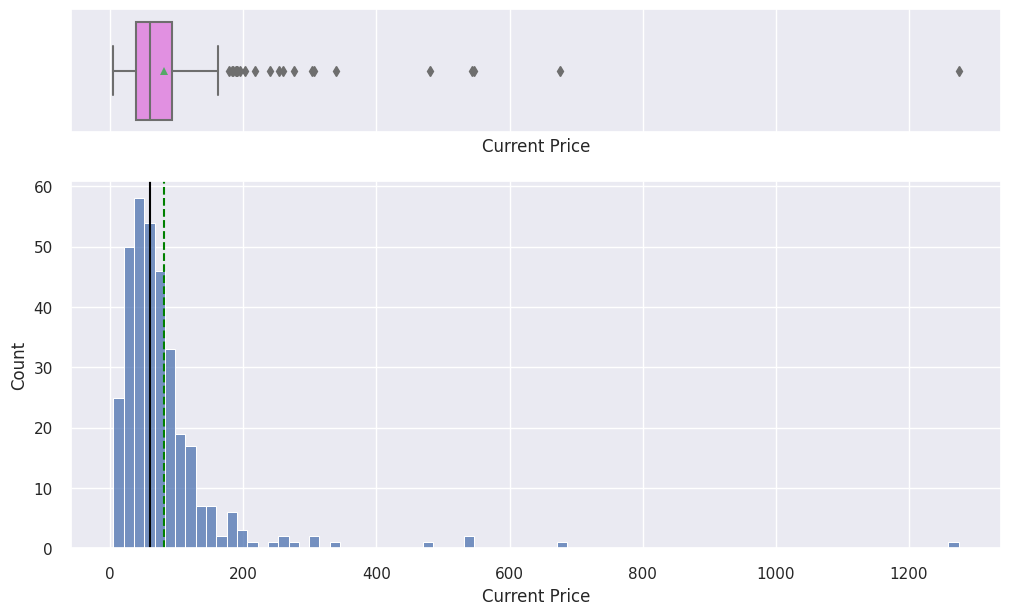

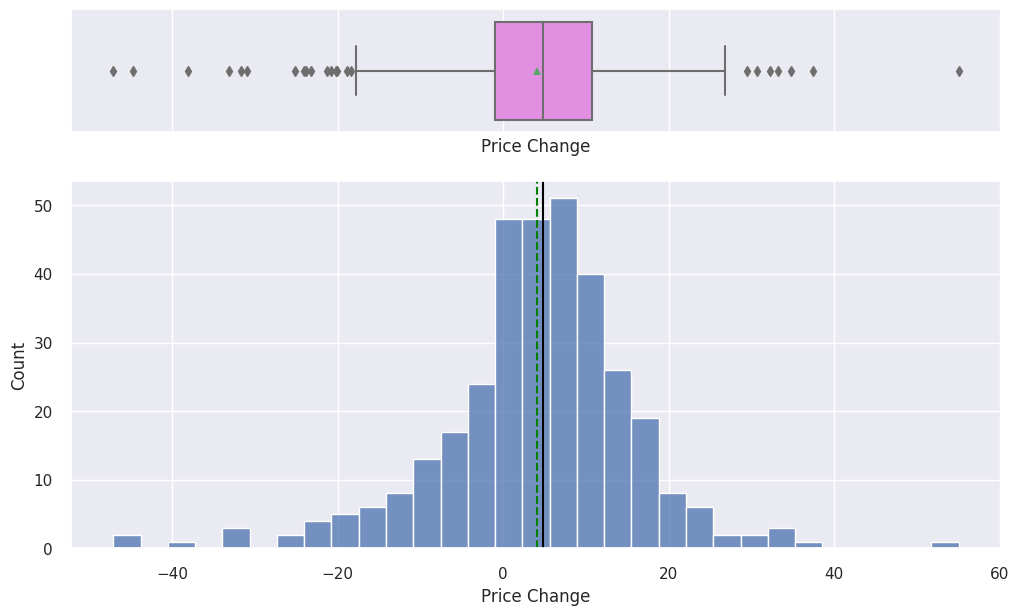

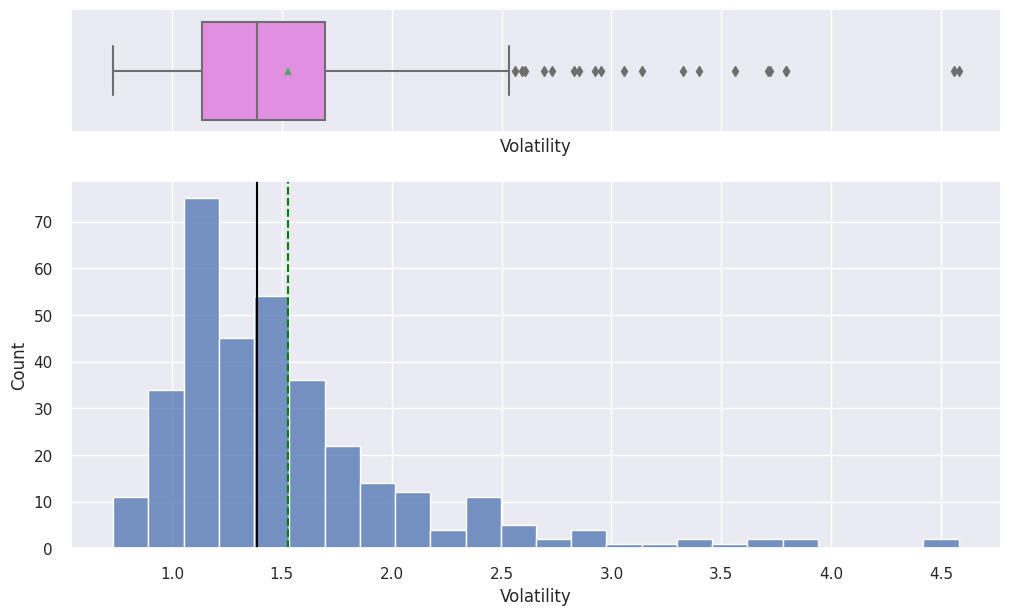

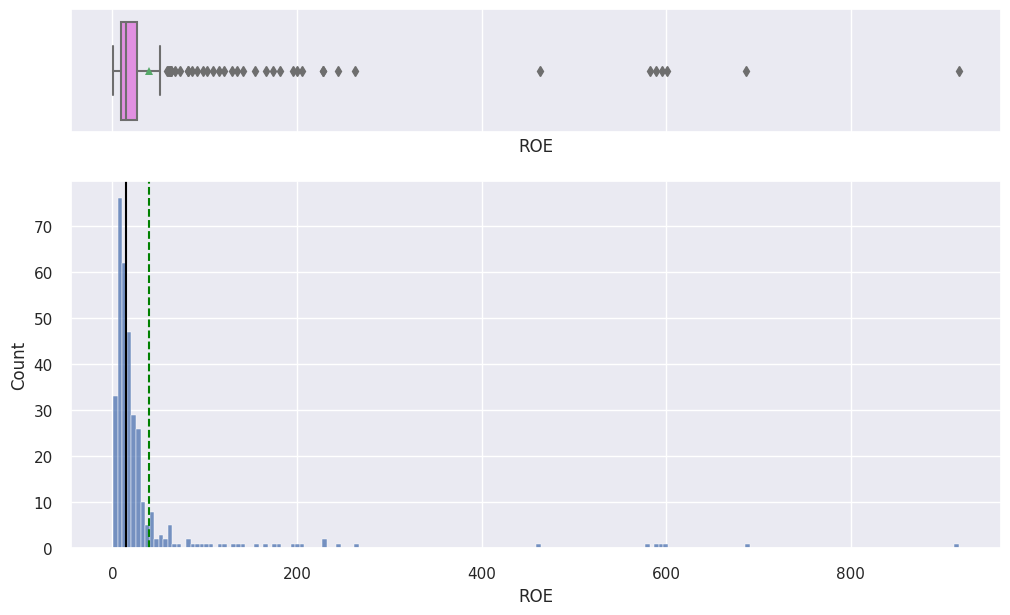

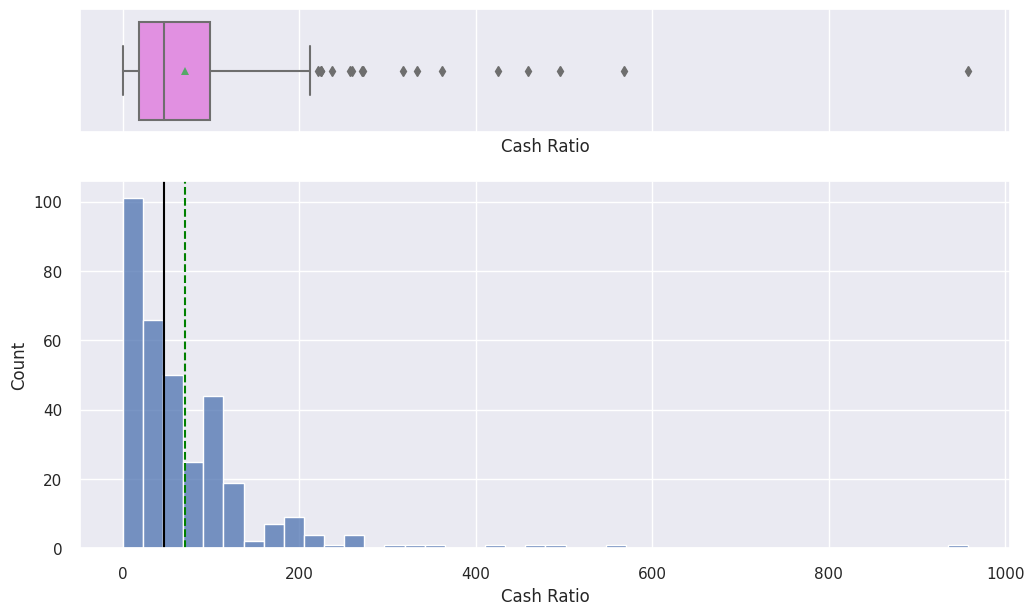

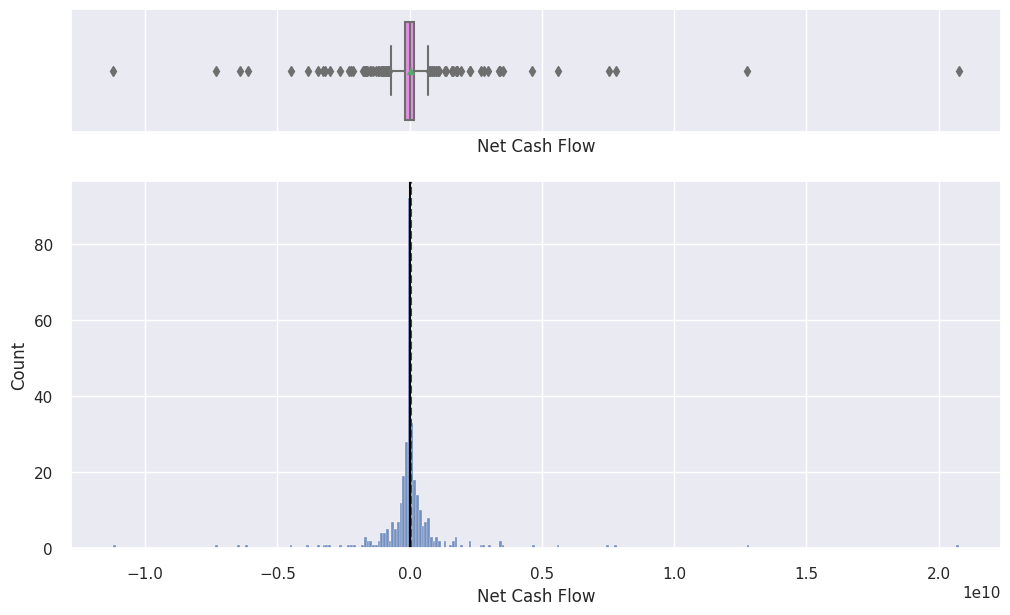

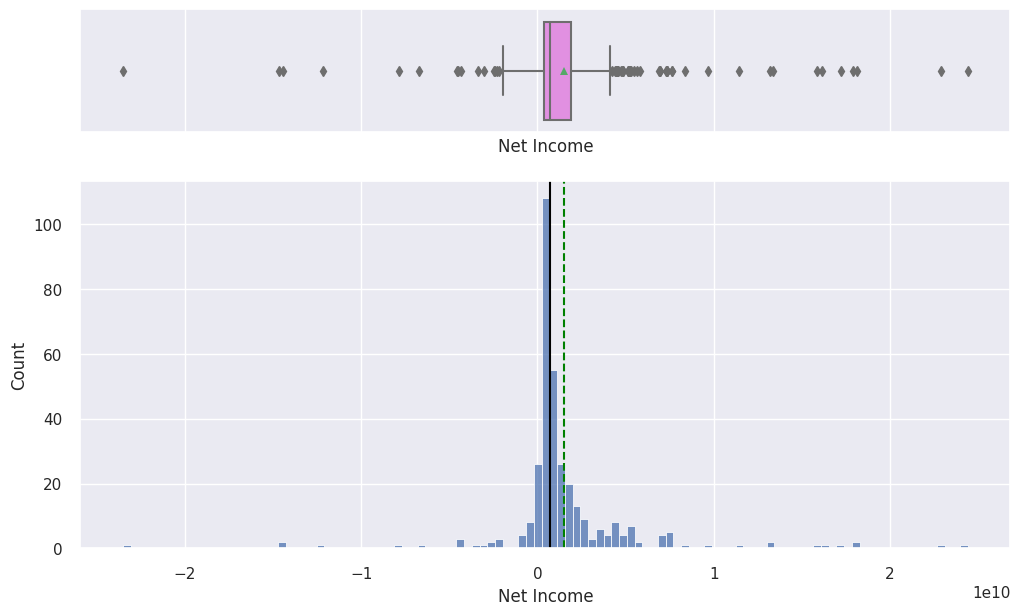

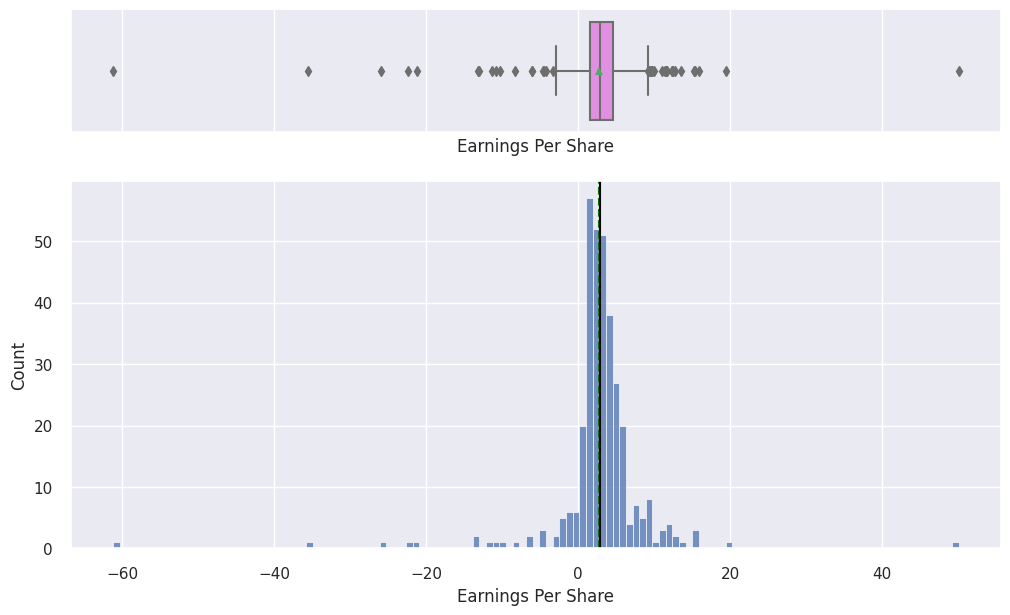

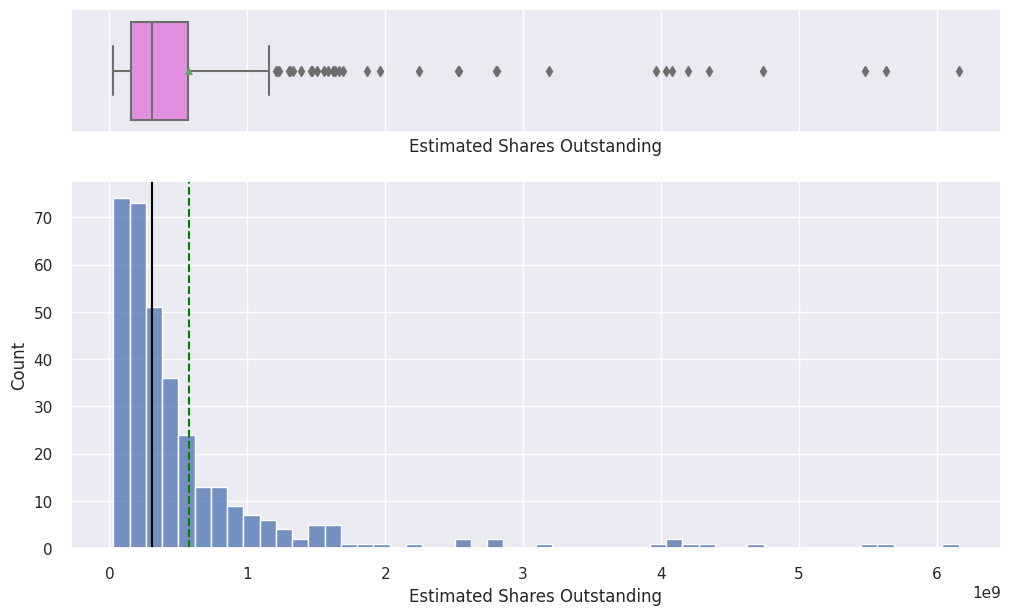

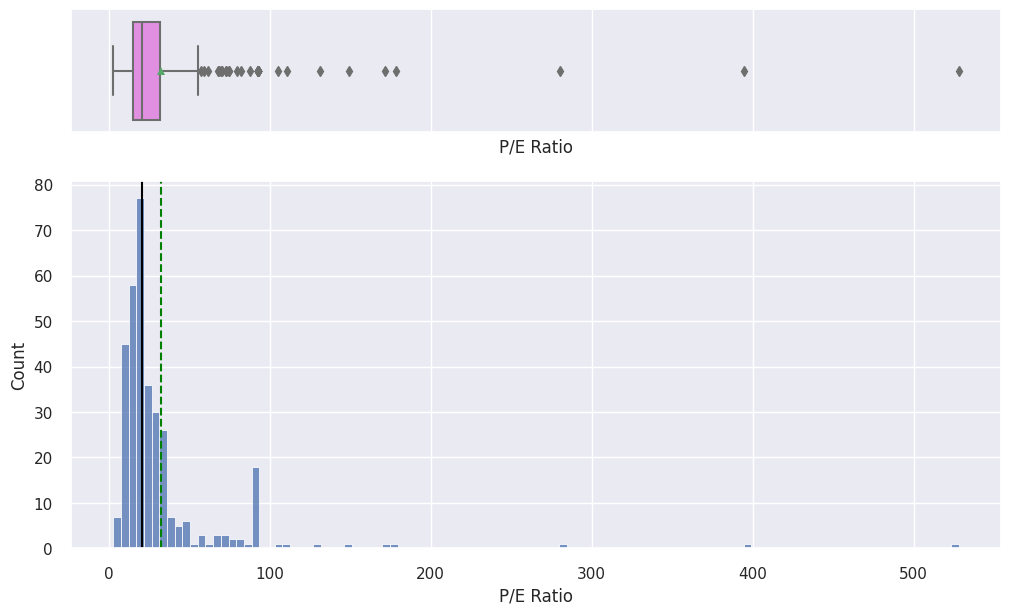

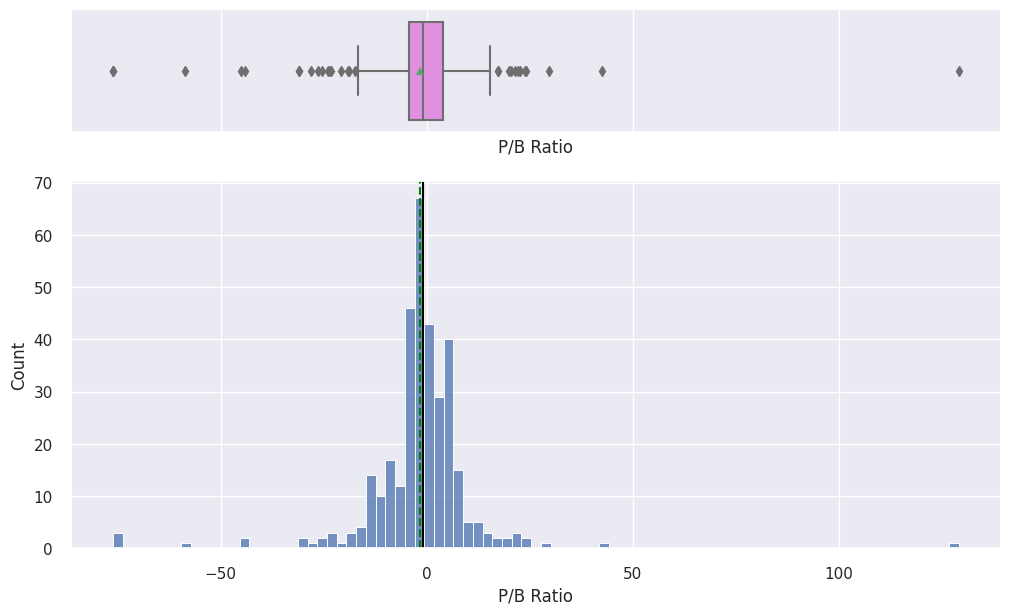

In [300]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_cols = num_col

for item in num_col:
    histogram_boxplot(df, item)

**Observations**
*   Current price has a right skewed distribution with several outliers at the upper whisker. At least 75% of the observations have a stock price that ranges from 4.5 to ~93.
*   Price change has a normal distribution with a mean of ~4%; outliers can be observed at both whiskers. Values ranges from ~ -47% to ~55% which means that there are products with favourable/unfavourable changes.
*   Volatility presents a right skewed distribution with a mean of ~1.5 standard deviations. Several outliers can be observed at the upper whisker.
*   ROE show a very pronounced right skewed distribution with a mean of ~40 and several very extreme outlier values. Is noticeable that the mean has been distorted by the outliers since the median is 15 and at least 75% of the observations have a ROE<=27. Very high values could represent companies with high net income (high profitability for each shareholders' equity unit).
*   Cash ratio has a right skewed distribution with a mean of ~70. Min values=0 would represent businesses that will not be able to cover short-term liabilities with its available cash/equivalents. Higher cash ratio cases indicate a strong liquidity position, as the company has a larger cash reserve to meet its obligations. On the other hand, a lower cash ratio may suggest that the company relies more on external financing or has a limited amount of cash available to cover its short-term liabilities.
*   Net cash flow has a normal distribution with some degree of right skewness; several outliers have been found at both whiskers sides.
*   Net income shows a right skewed distribution with outliers at both sides of the whiskers. Negative values represent Net loss where company total expenses exceed its total revenue.
*   Earnings per share show a normal distribution with some outliers at both sides of the whiskers. 50% of the observations values range from 1.55 to 4.62.
*   Estimated shares outstanding and P/E ratio shows a right skewed distribution with outliers at the upper whisker side.
*   P/B ratio shows a evenly normal distribution with a few outliers at both whiskers side. Negative values of P/B ratio would mean that company's liabilities exceed its assets, resulting in a negative net worth, other scenarios might be sustained losses, significant write-downs, or other financial difficulties













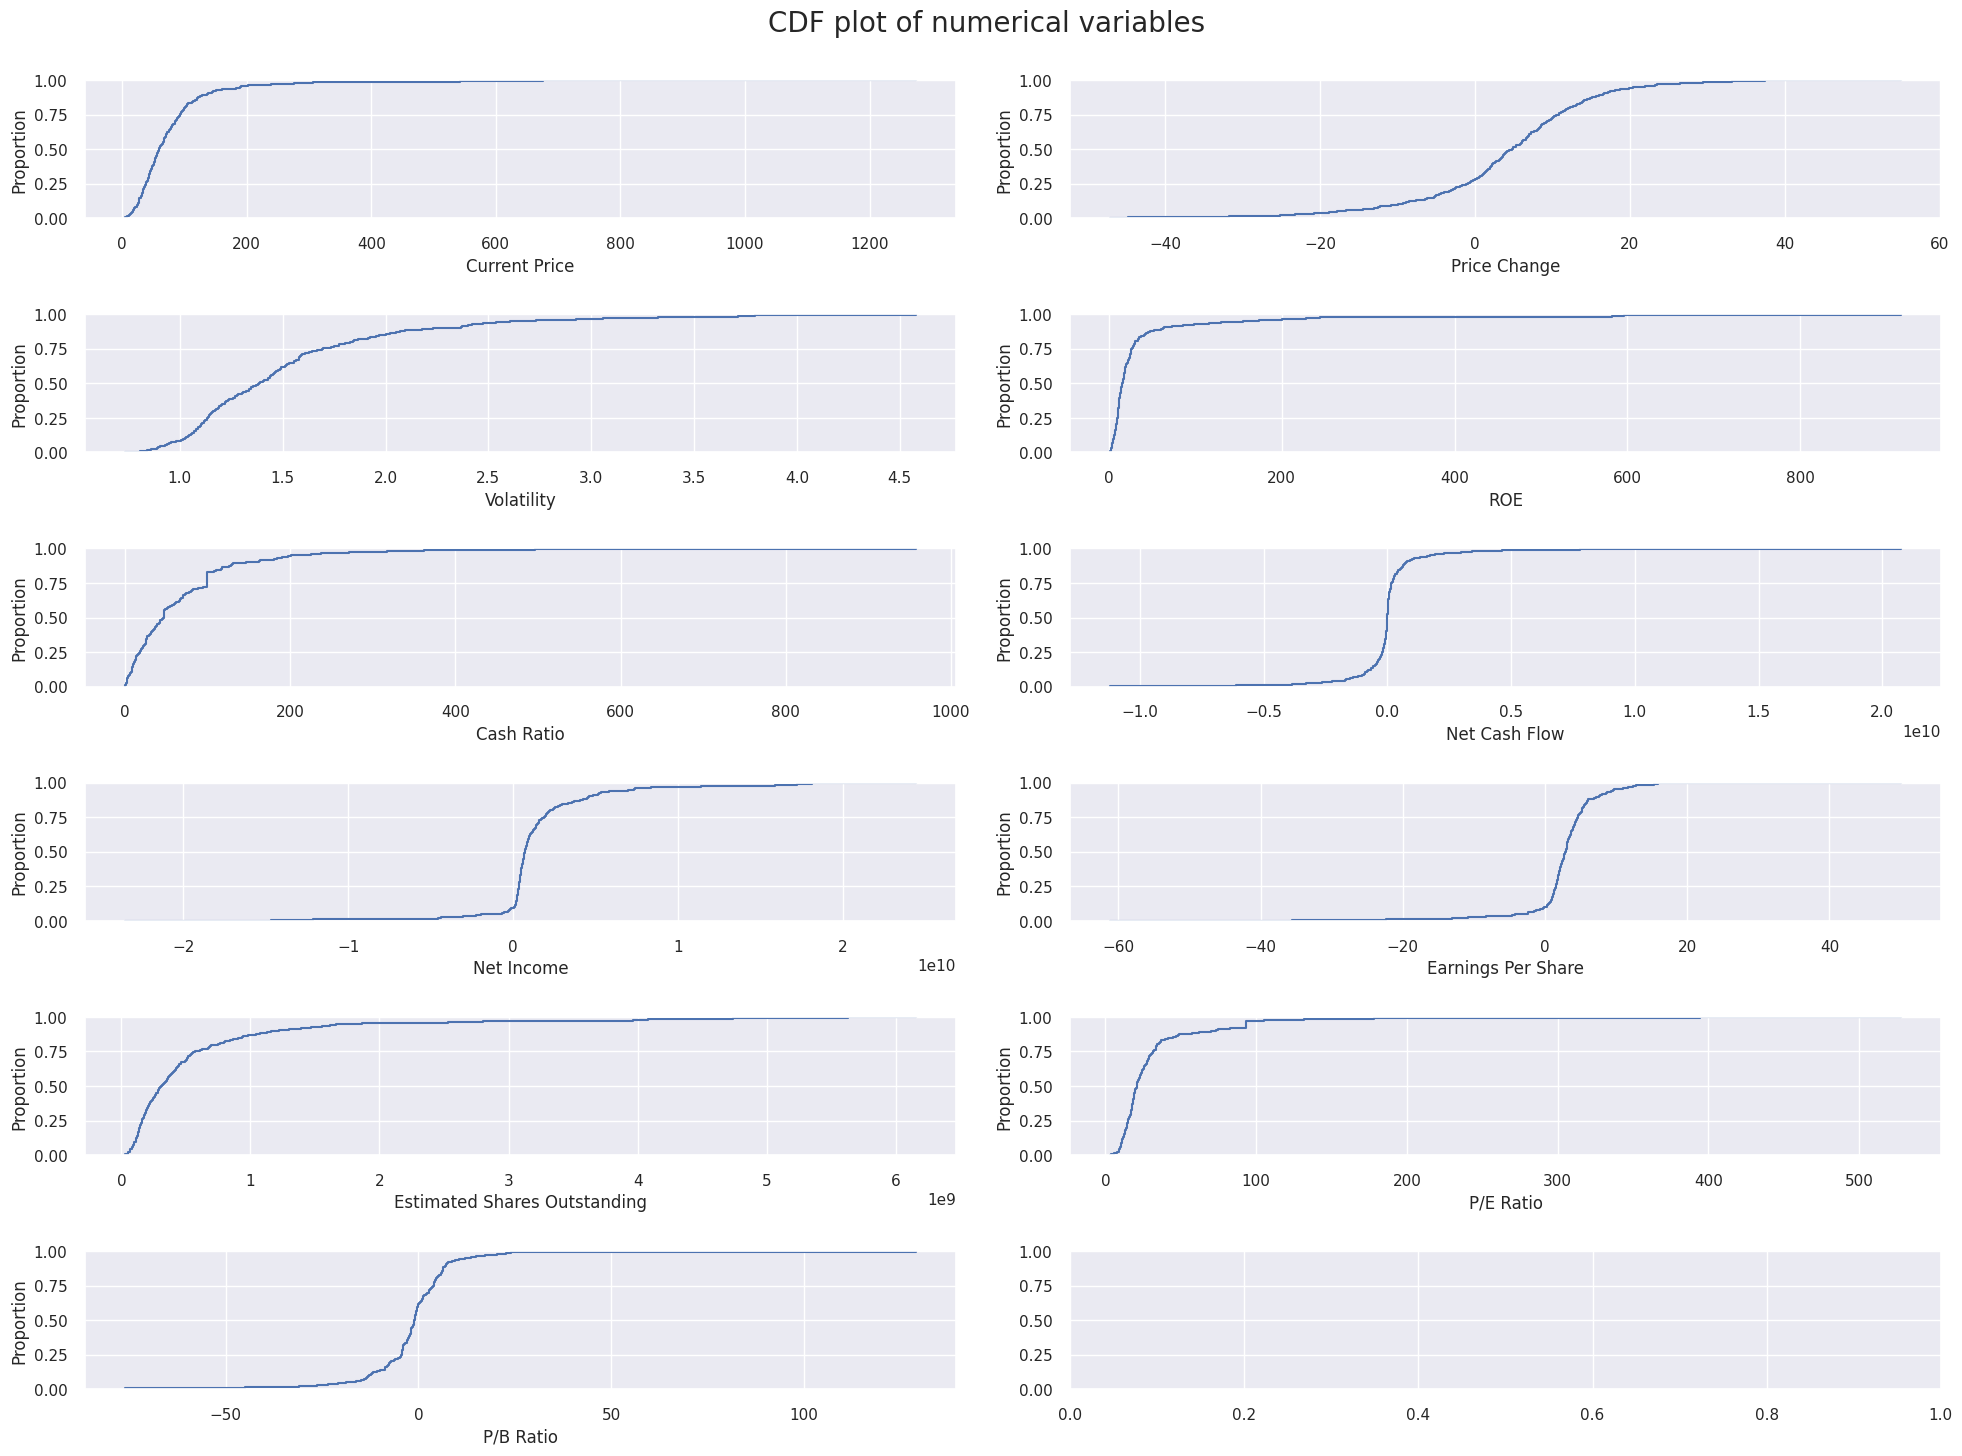

In [301]:
fig, axes = plt.subplots(6, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(6):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 11:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**

- 80% of the observations have current stock price less than 100.
- 25% of the companies have negative price change, around 60% of the observations have a price change that ranges from 0% to 20%
- 95% of the companies have ROE less than 100.
- 95% off the companies have a cash ratio of 200 that means a very high level of cash relative to its current liabilities, and a 60% has a negative Net cash flow
- 10% of the observations have a negative net income, thus 10% of have a negative Earnings Per share(losses)
- ~ 80% of the companies have P/E ratio<= ~ 40, the rest have ration>~40
- 60% of the companies have a negative P/B ratio which might need to be further investigated as it typically arise in unique situations such as extreme market anomalies, technical glitches, or data errors. For example, a software malfunction or a trading error might briefly result in a negative price for a specific trade, but it would usually be corrected promptly. Expert advice might be needed from a person with a solid understanding of the industry/market.



In [302]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

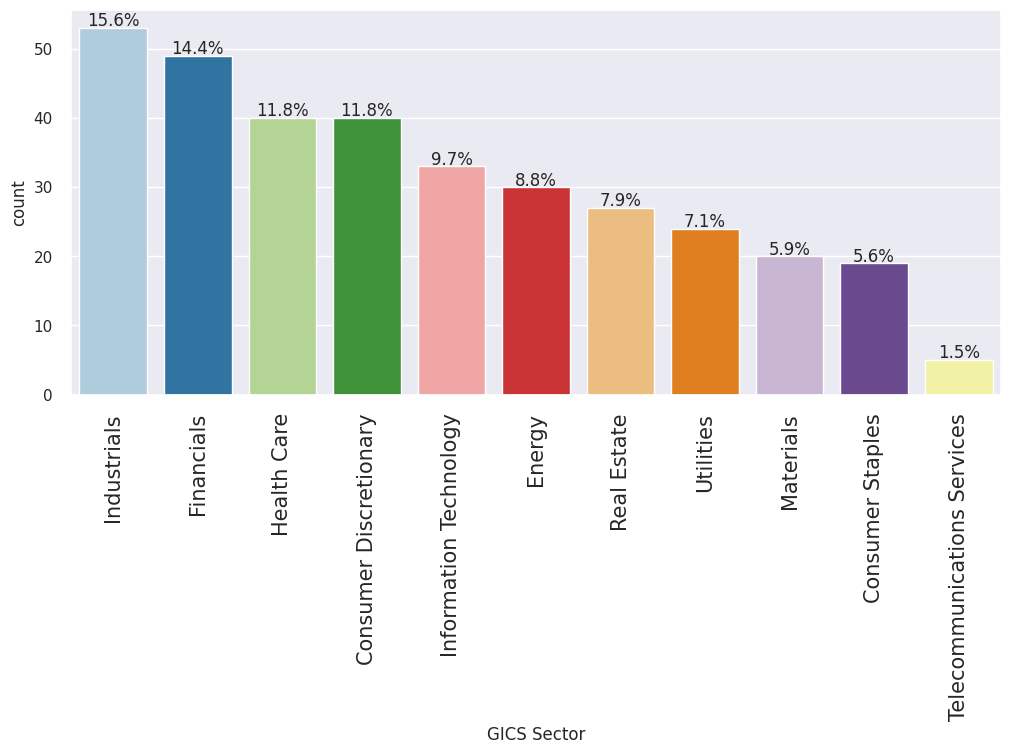

In [303]:
#
labeled_barplot(df, "GICS Sector", perc=True)

**Observations**

- Industrials, Financials and Health Care covera bout 42% of the obsevations.
- Telecomunications service is the sector with less contribution.

### Bivariate Analysis

#### Let's check for correlations

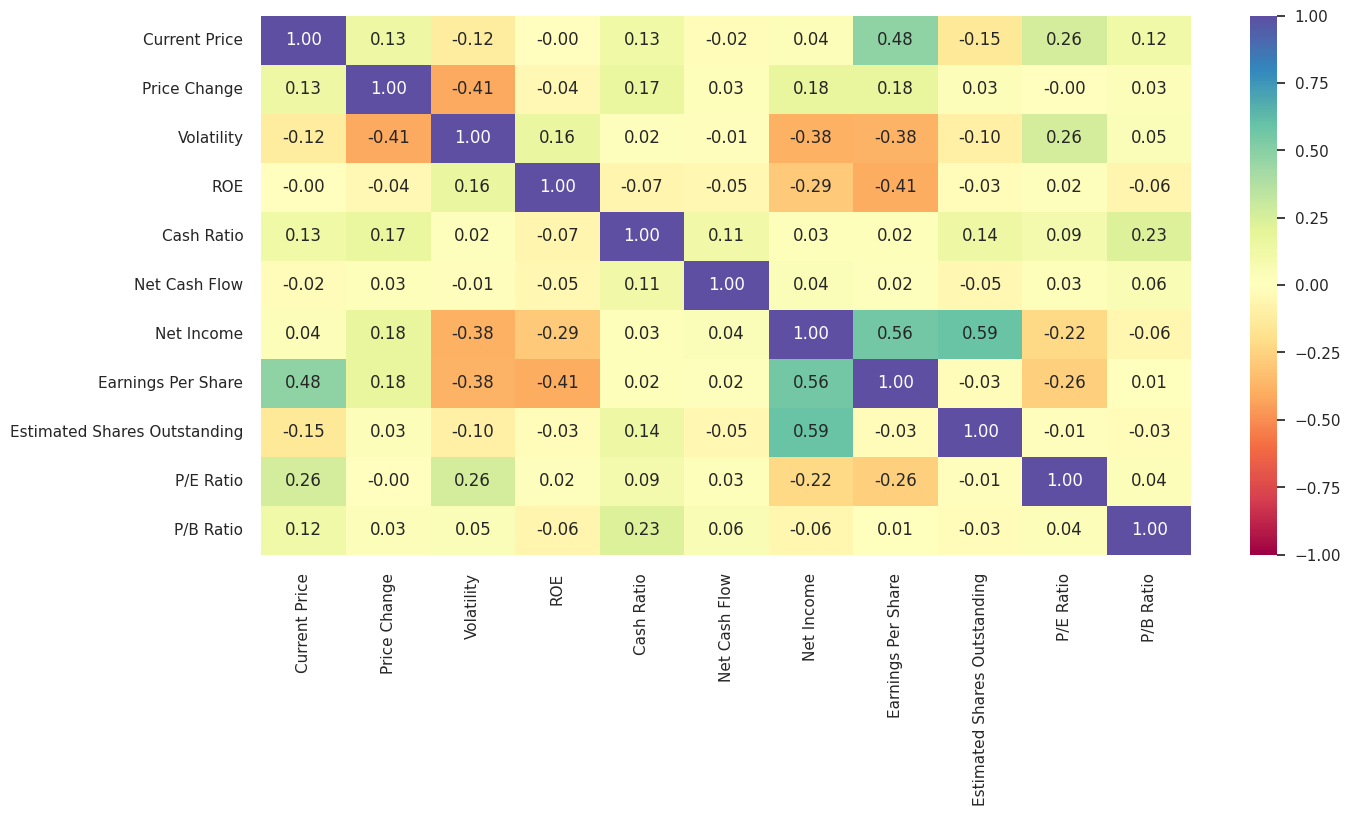

In [304]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

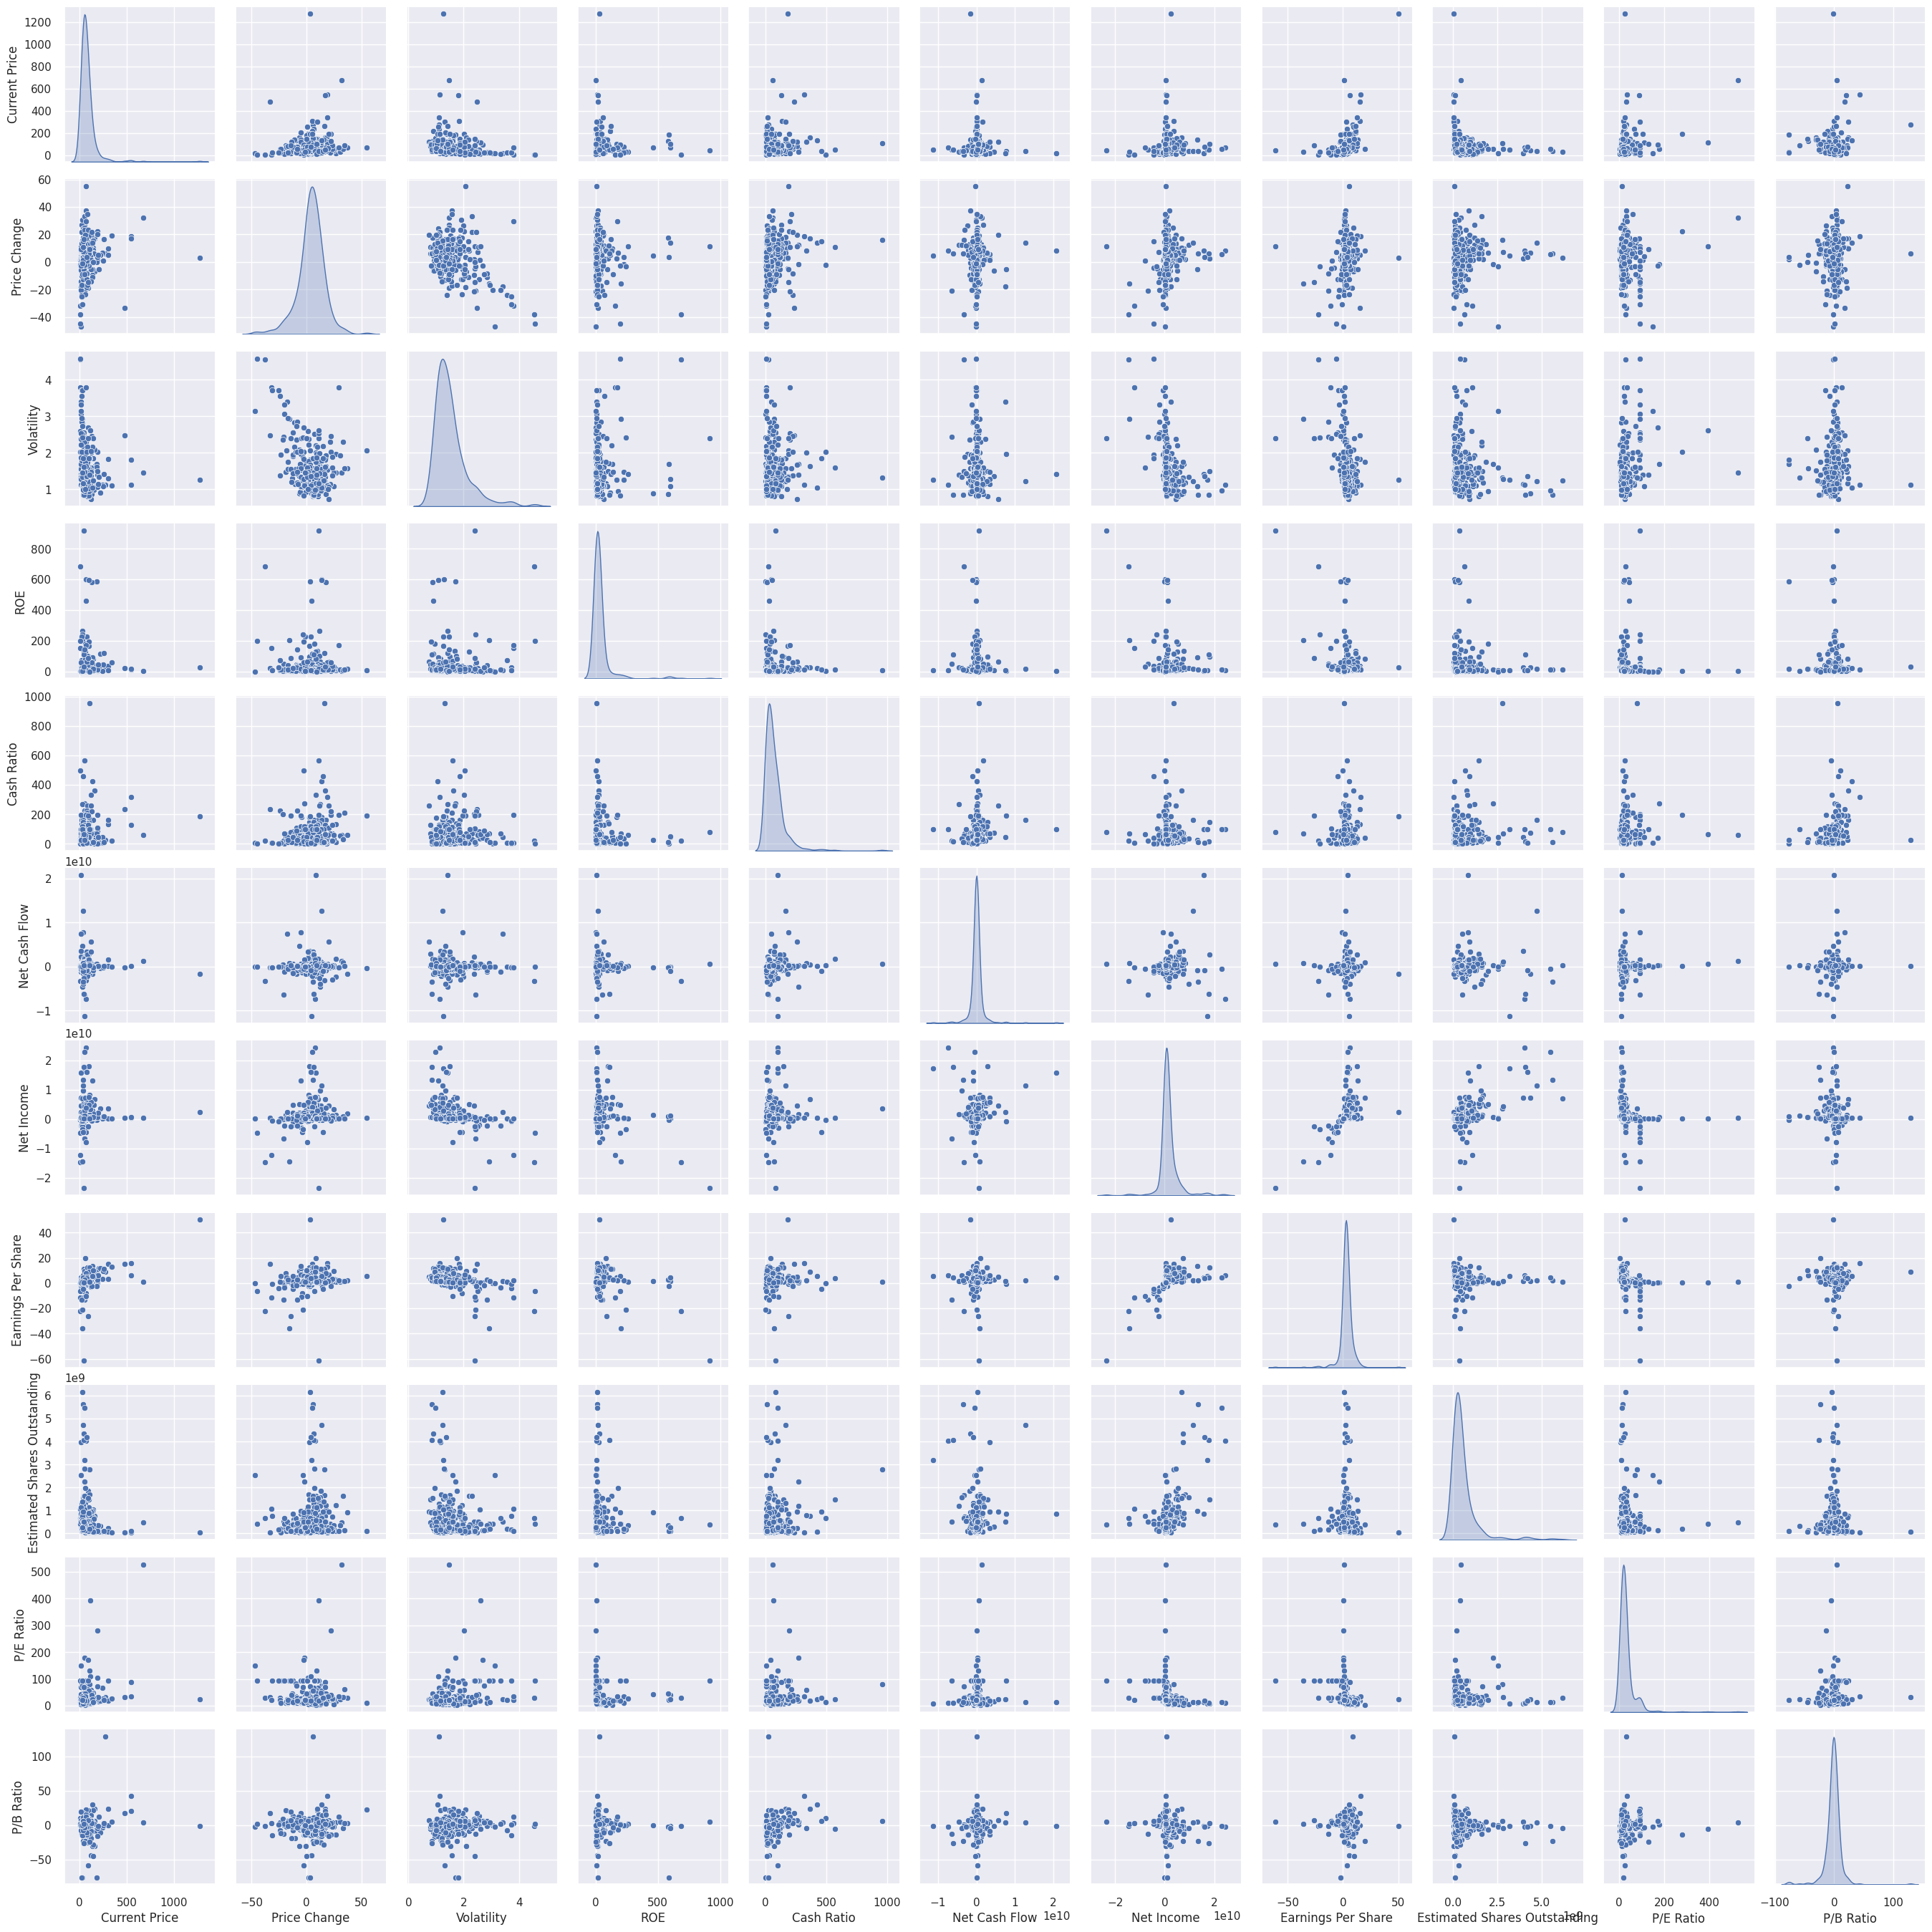

In [305]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Observations**

- Earnings per share seems to have some degree of positive correlation with Current Price
- Earnings per share and Estimated Shares Outstanding have some degree of correlation(~60%) with Net Income
- Net Income and Earnings per Share seems to have some degree of negative correlation with Volatility.
- Earnings per share seems to have a low degree of negative correlation with ROE, data has been verified and there are cases where a high ROE is observed while

## Data Pre-processing
- Duplicate value check
- Missing value treatment (if needed)
- Outlier check and treatment (if needed)
- Feature Scaling
- Any other preprocessing steps (if needed)

####Duplicate value check

In [306]:
# dropping the Ticker Symbol column as it does not provide any information
df.drop("Ticker Symbol", axis=1, inplace=True)

In [307]:
#Checking if duplicates are found in the dataset
dup_count=df[df.duplicated()]["Security"].count()
print("There are ",dup_count," duplicate observations")

There are  0  duplicate observations


####Missing value treatment

No need of missing value treatment, as per below 2 verifications we don't have missing data nor typos or unexpected codes/text in the object variables nor the numeric ones.

In [308]:
#checking df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Security                      340 non-null    object 
 1   GICS Sector                   340 non-null    object 
 2   GICS Sub Industry             340 non-null    object 
 3   Current Price                 340 non-null    float64
 4   Price Change                  340 non-null    float64
 5   Volatility                    340 non-null    float64
 6   ROE                           340 non-null    int64  
 7   Cash Ratio                    340 non-null    int64  
 8   Net Cash Flow                 340 non-null    int64  
 9   Net Income                    340 non-null    int64  
 10  Earnings Per Share            340 non-null    float64
 11  Estimated Shares Outstanding  340 non-null    float64
 12  P/E Ratio                     340 non-null    float64
 13  P/B R

In [309]:
# checking for missing values
df.isnull().sum()

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

####Outlier detection and treatment
Outlier treatment will not be performed, and we will use the data as it is. We would need a very strong background of the stock market to be able to decided wheter a very high or very low value is an outlier or not. We can observe that there are a lot of outliers in the different numeric features we have analyzed in the EDA univariate(boxplots and KDE). Nonetheless, by checking the different values in the outliers for each columns they don't seem impossible values, some of them might be unlikely but not impossible.

Just to check some features:
- For Current Price we can observe outlier values, nonetheless we would need further checks or maybe support to really conclude if such values are genuine, or if they are typos, wrong data, etc.
- We can also find outliers caused due a positive ROE where the income is negative. Despite this is posible; is an unusual behavior for such indicators that would need to be investigated by checking if the information is correct, Maybe we would need to check with the data owners to try to have a better understanding of those cases.
- At last we can also observe negative values for P/B Ratio which is an unusual behaviour for that indicator, nonetheless can be observed that a good portion of the observations stick to that behavior, so P/B Ratio feature might need to be double checked with the data owners to get a better understanding of what are the underlying reasons behind those negative values.

So for the above mentioned reasons/explanations, outliers will not be treated.

####Feature Scaling

In [310]:
#Varaibles that will be used for clustering
num_col

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [311]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)


In [312]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Answering above questions with below calculations!

### Univariate Analysis

In [313]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

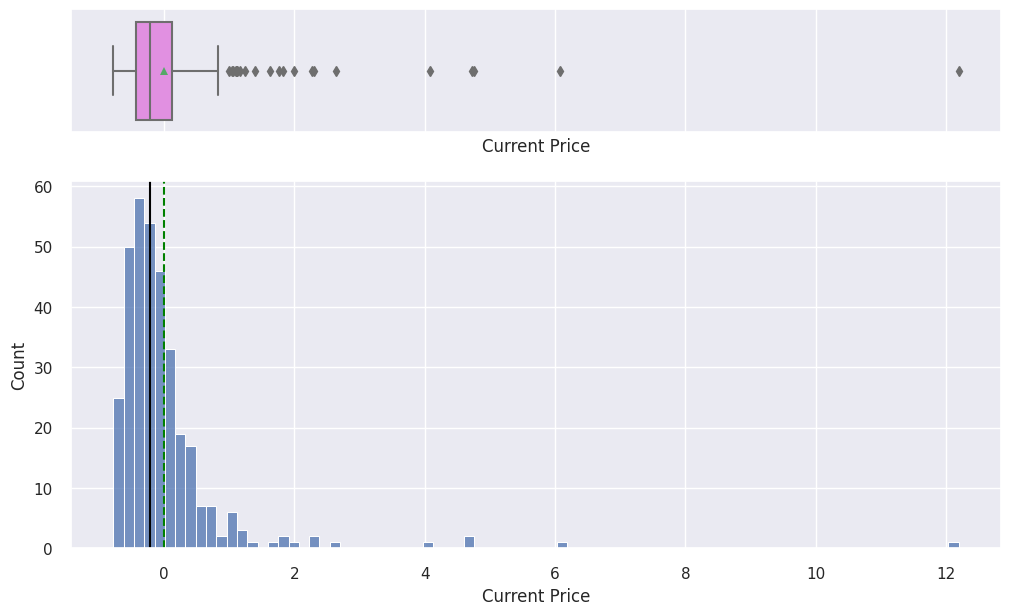

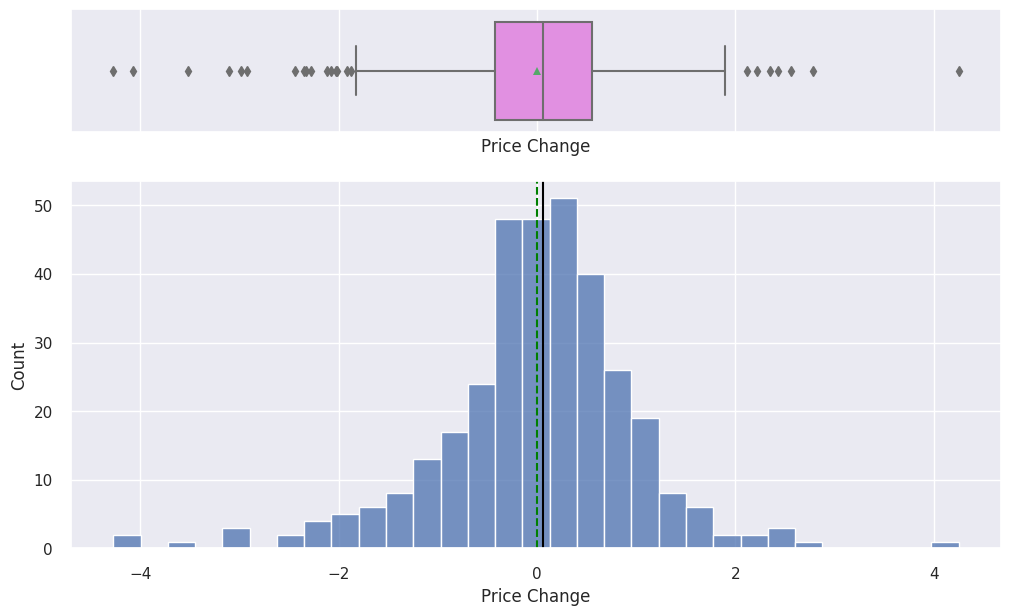

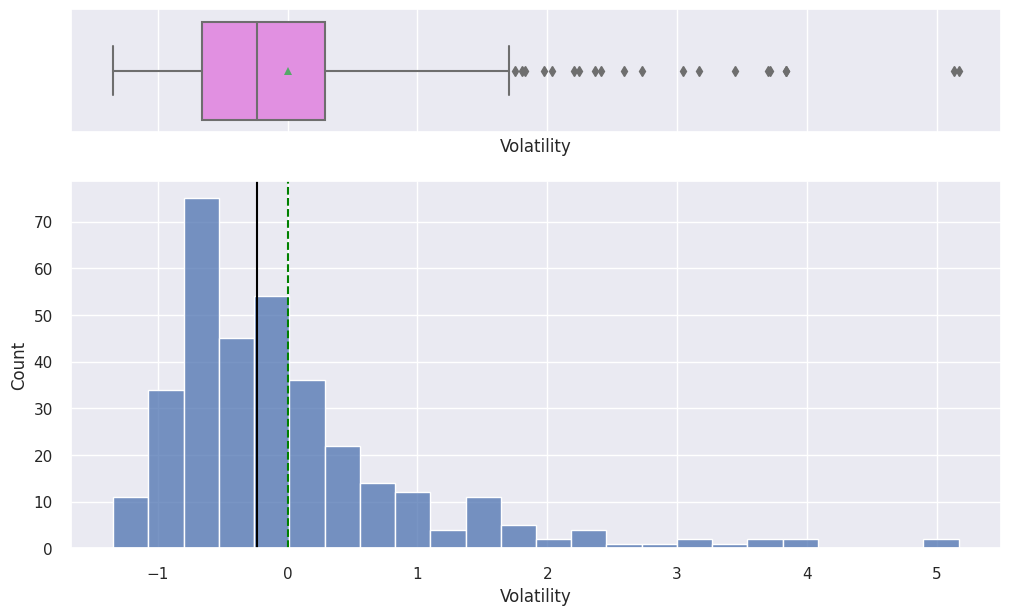

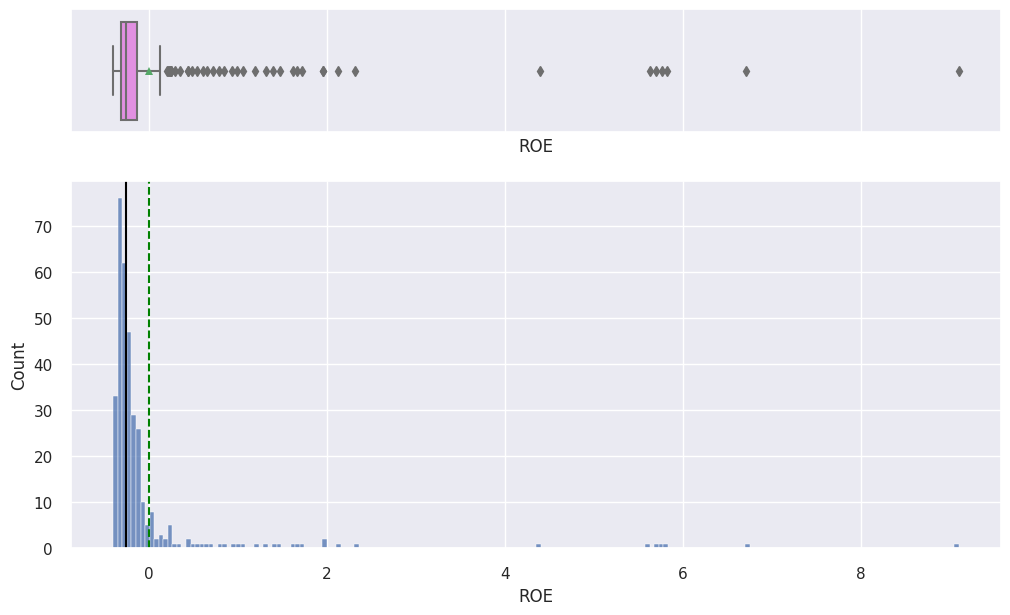

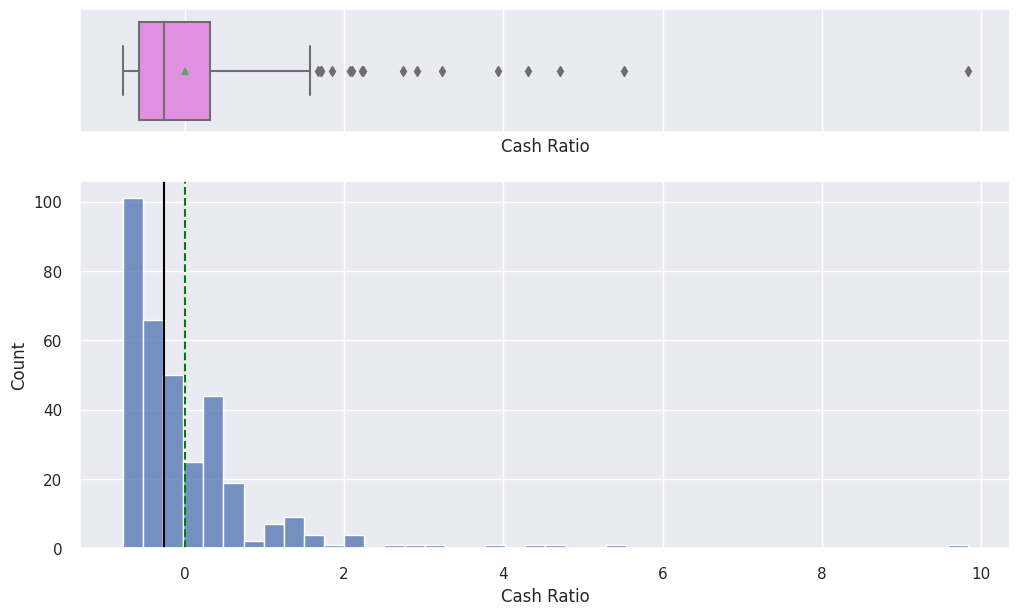

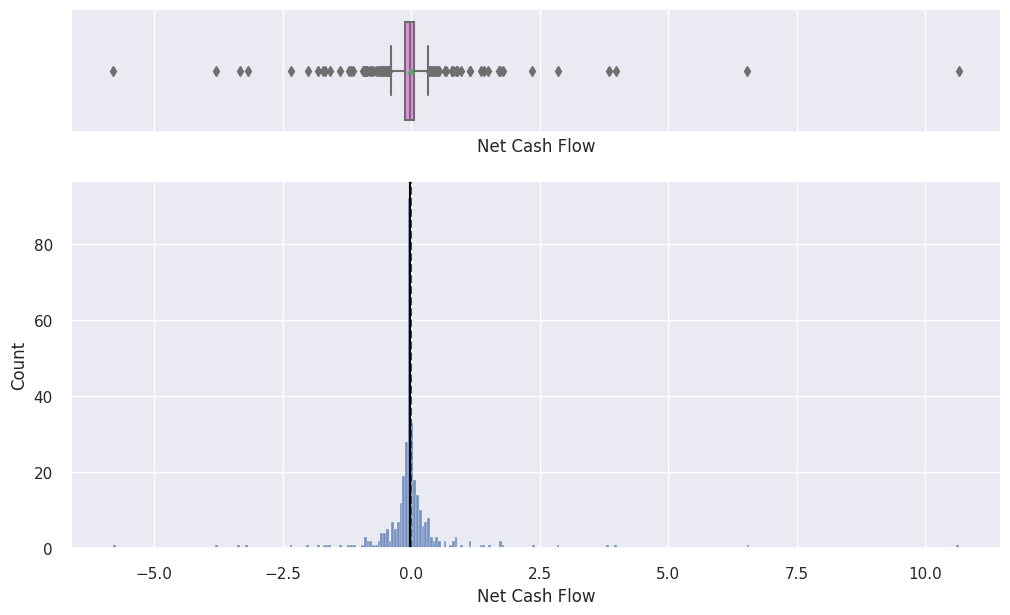

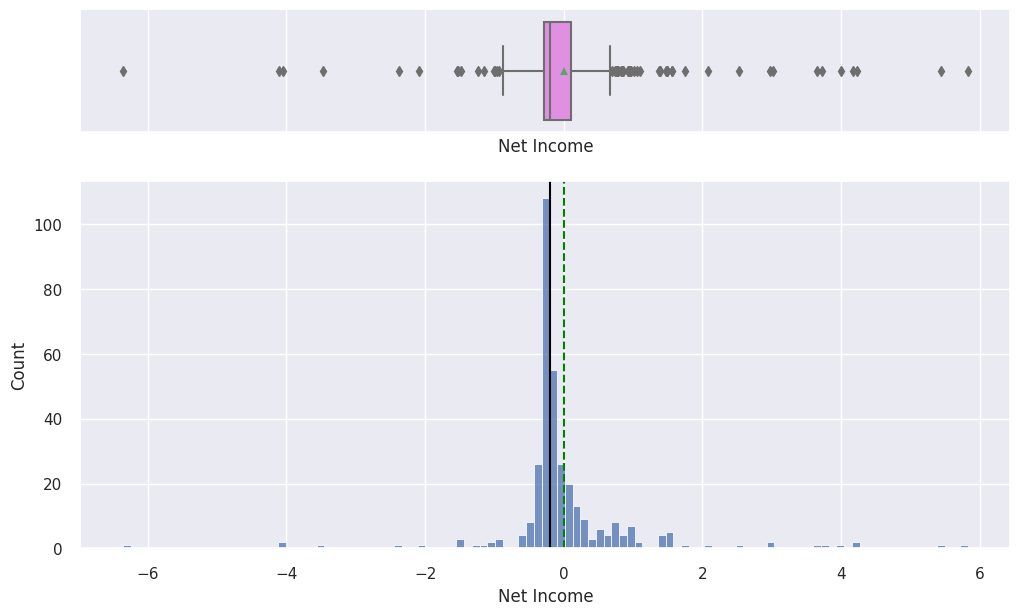

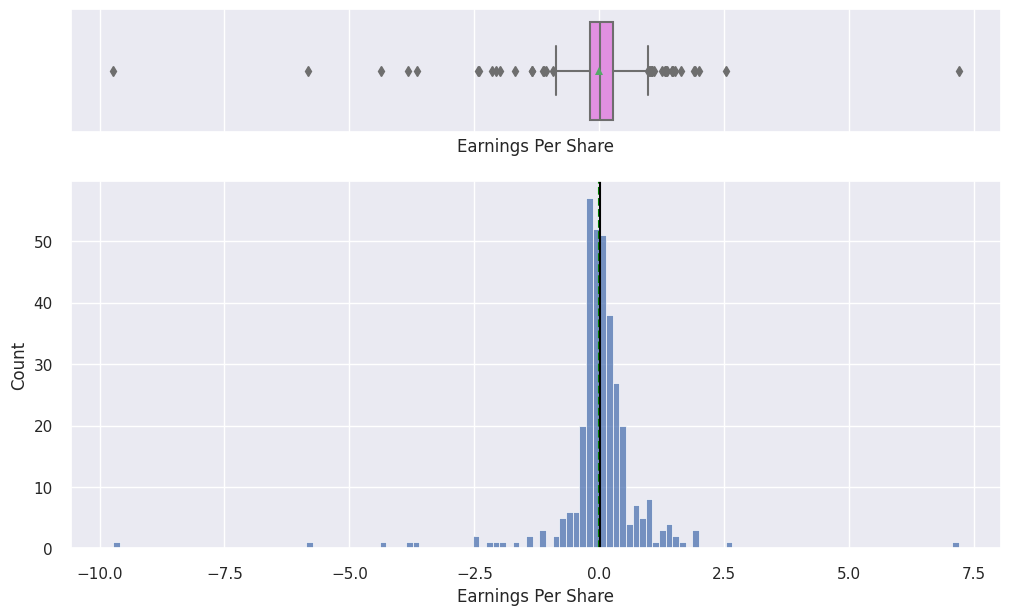

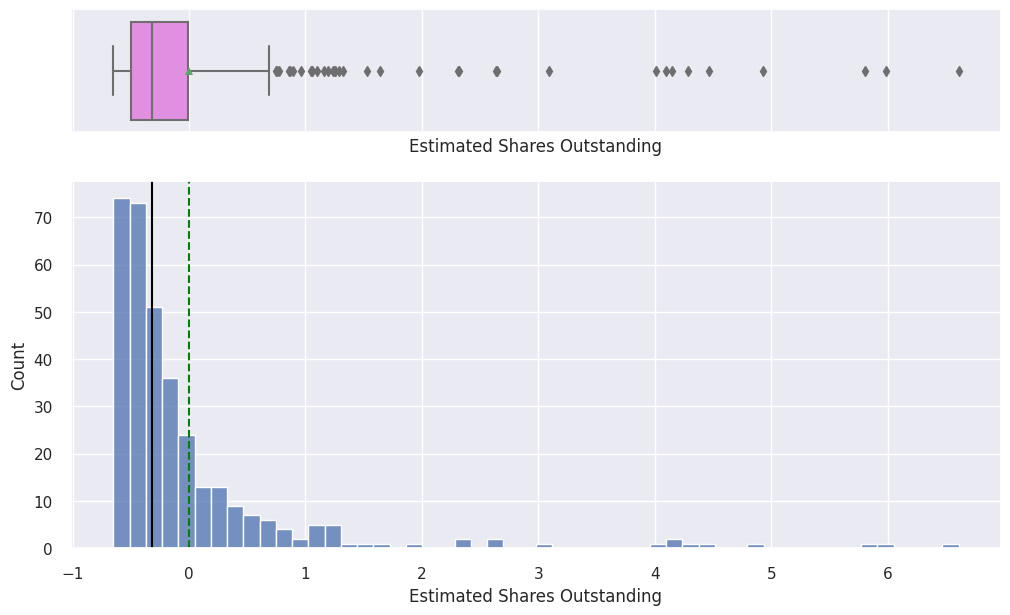

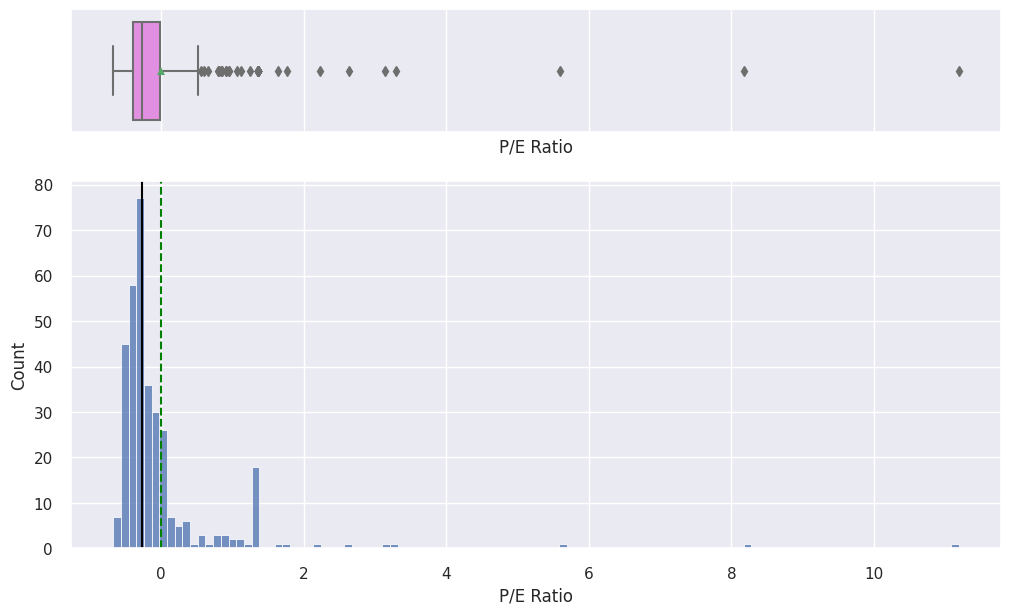

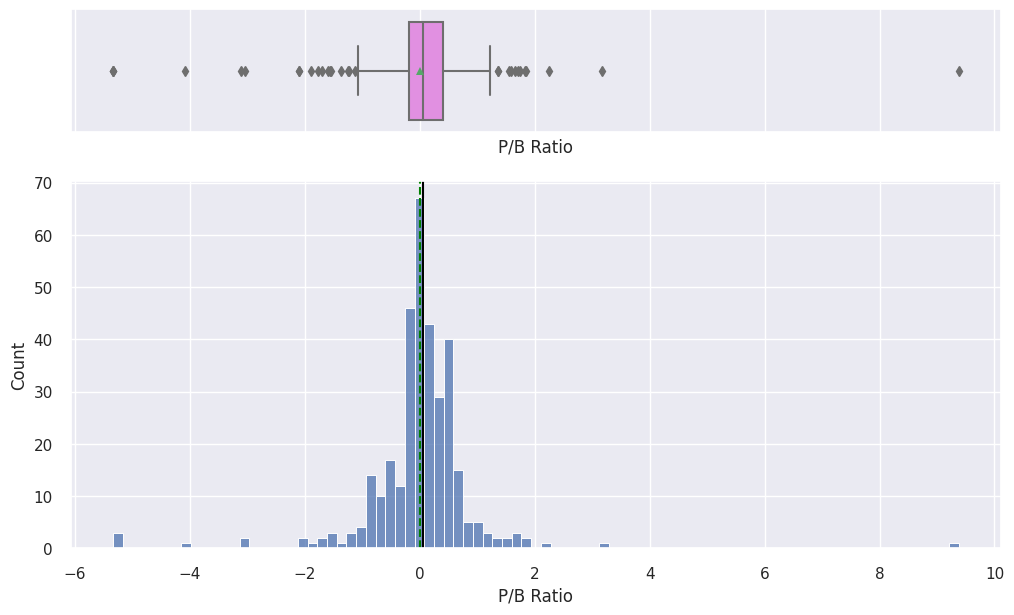

In [314]:
# selecting numerical columns
num_col = subset_scaled_df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(subset_scaled_df, item)

**Observations**
* Distribution for scaled data is consisten with the results of EDA prior scaling.
* All different distributions have been previously analyzed, so deep dive checks will not be performed again for univariate analysis(proportionall at the relevant scale; outcomes would be the same)













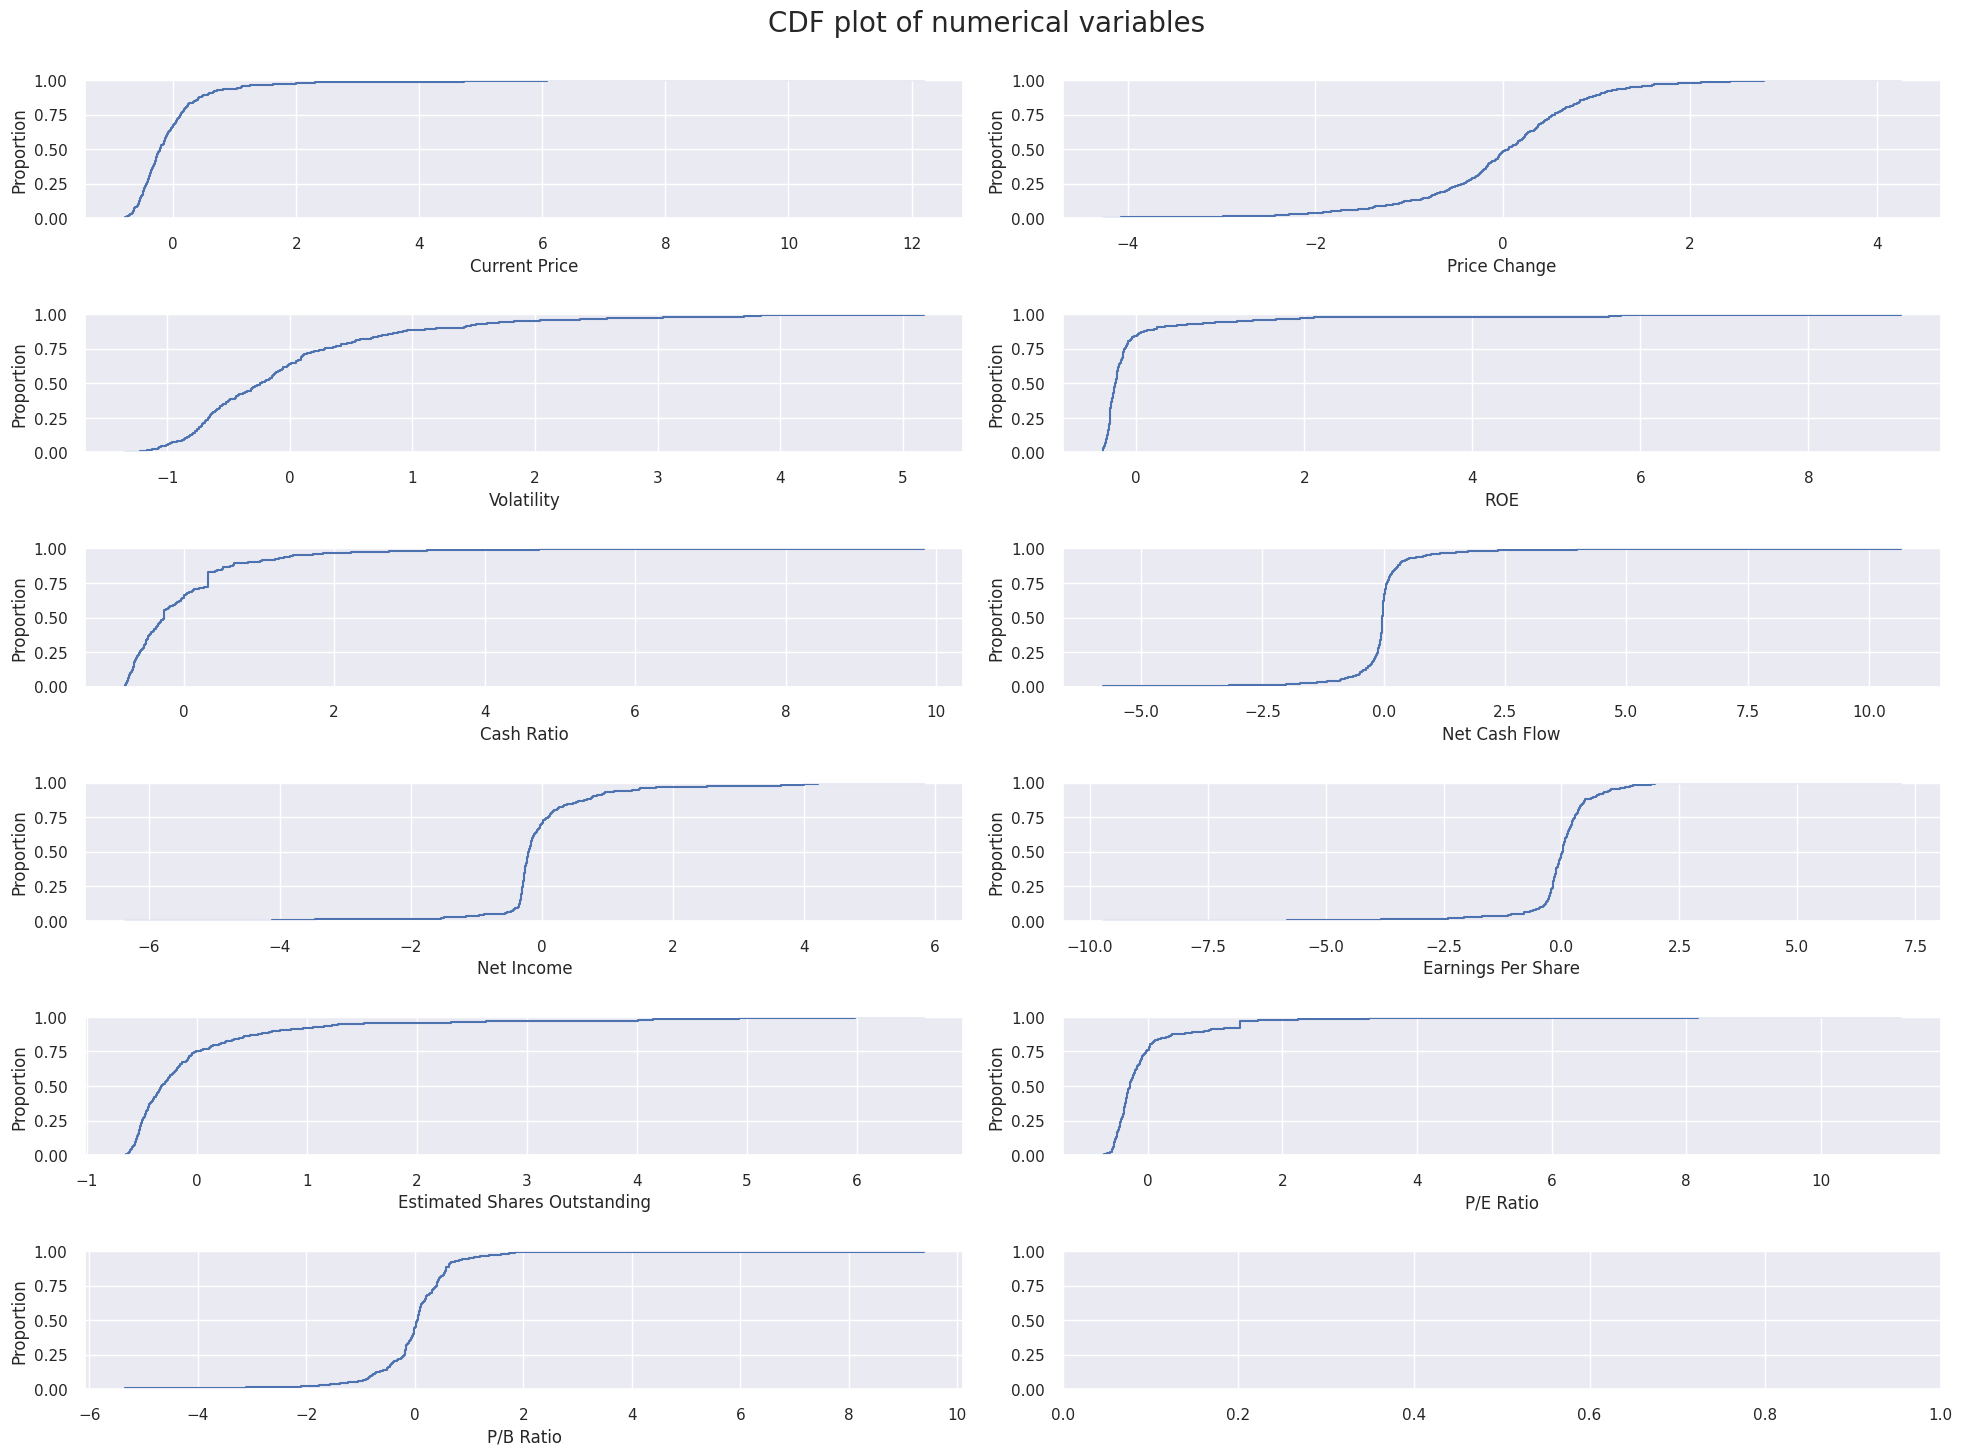

In [315]:
fig, axes = plt.subplots(6, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(6):
    sns.ecdfplot(ax=axes[ii][0], x=subset_scaled_df[num_col[counter]])
    counter = counter + 1
    if counter != 11:
        sns.ecdfplot(ax=axes[ii][1], x=subset_scaled_df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**
* Distribution of CDF for scaled data is consisten with the results of EDA prior scaling.
* All different distributions have been previously analyzed, so deep dive checks will not be performed again for univariate analysis(proportionall at the relevant scale; outcomes are the same)


In [316]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Bivariate Analysis

#### Let's check for correlations

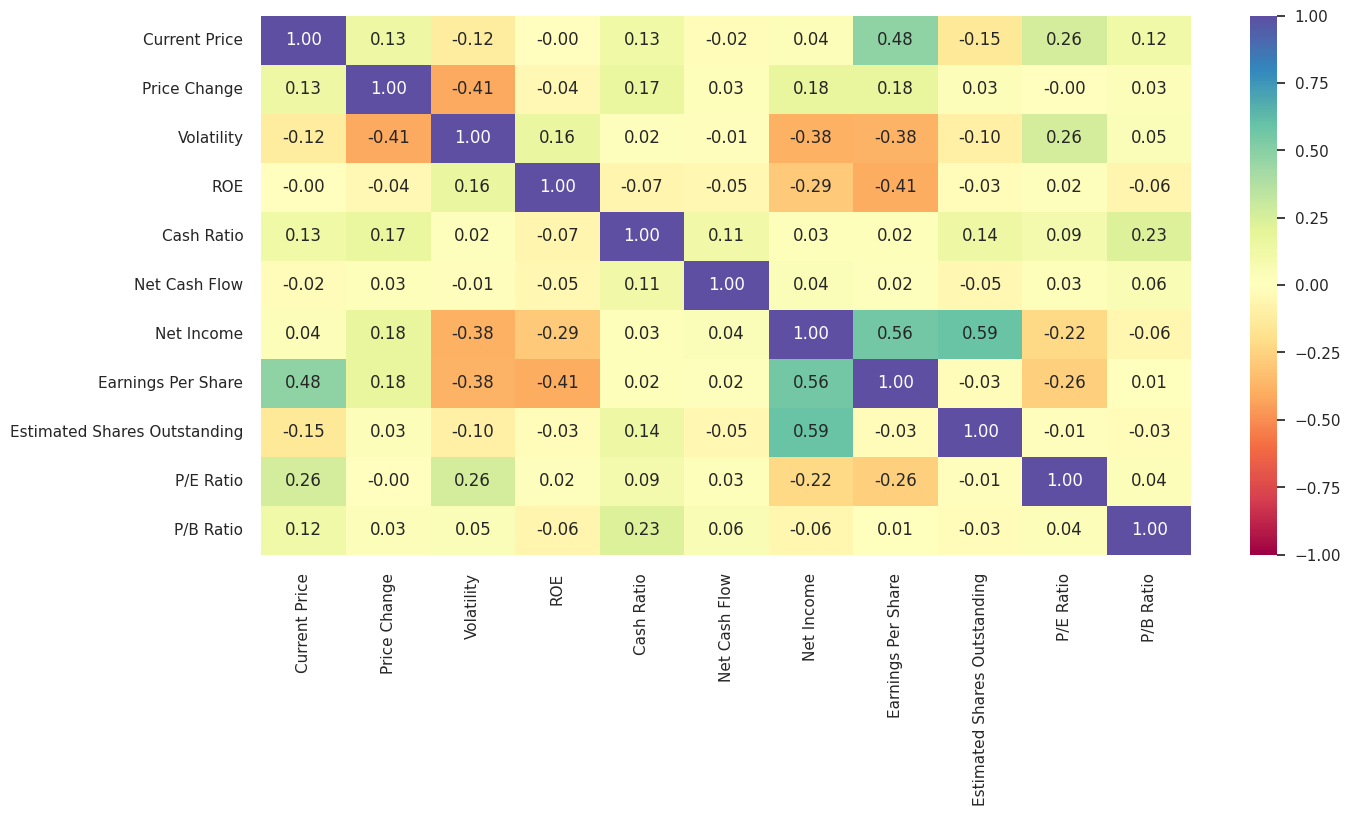

In [317]:
plt.figure(figsize=(15, 7))
sns.heatmap(subset_scaled_df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

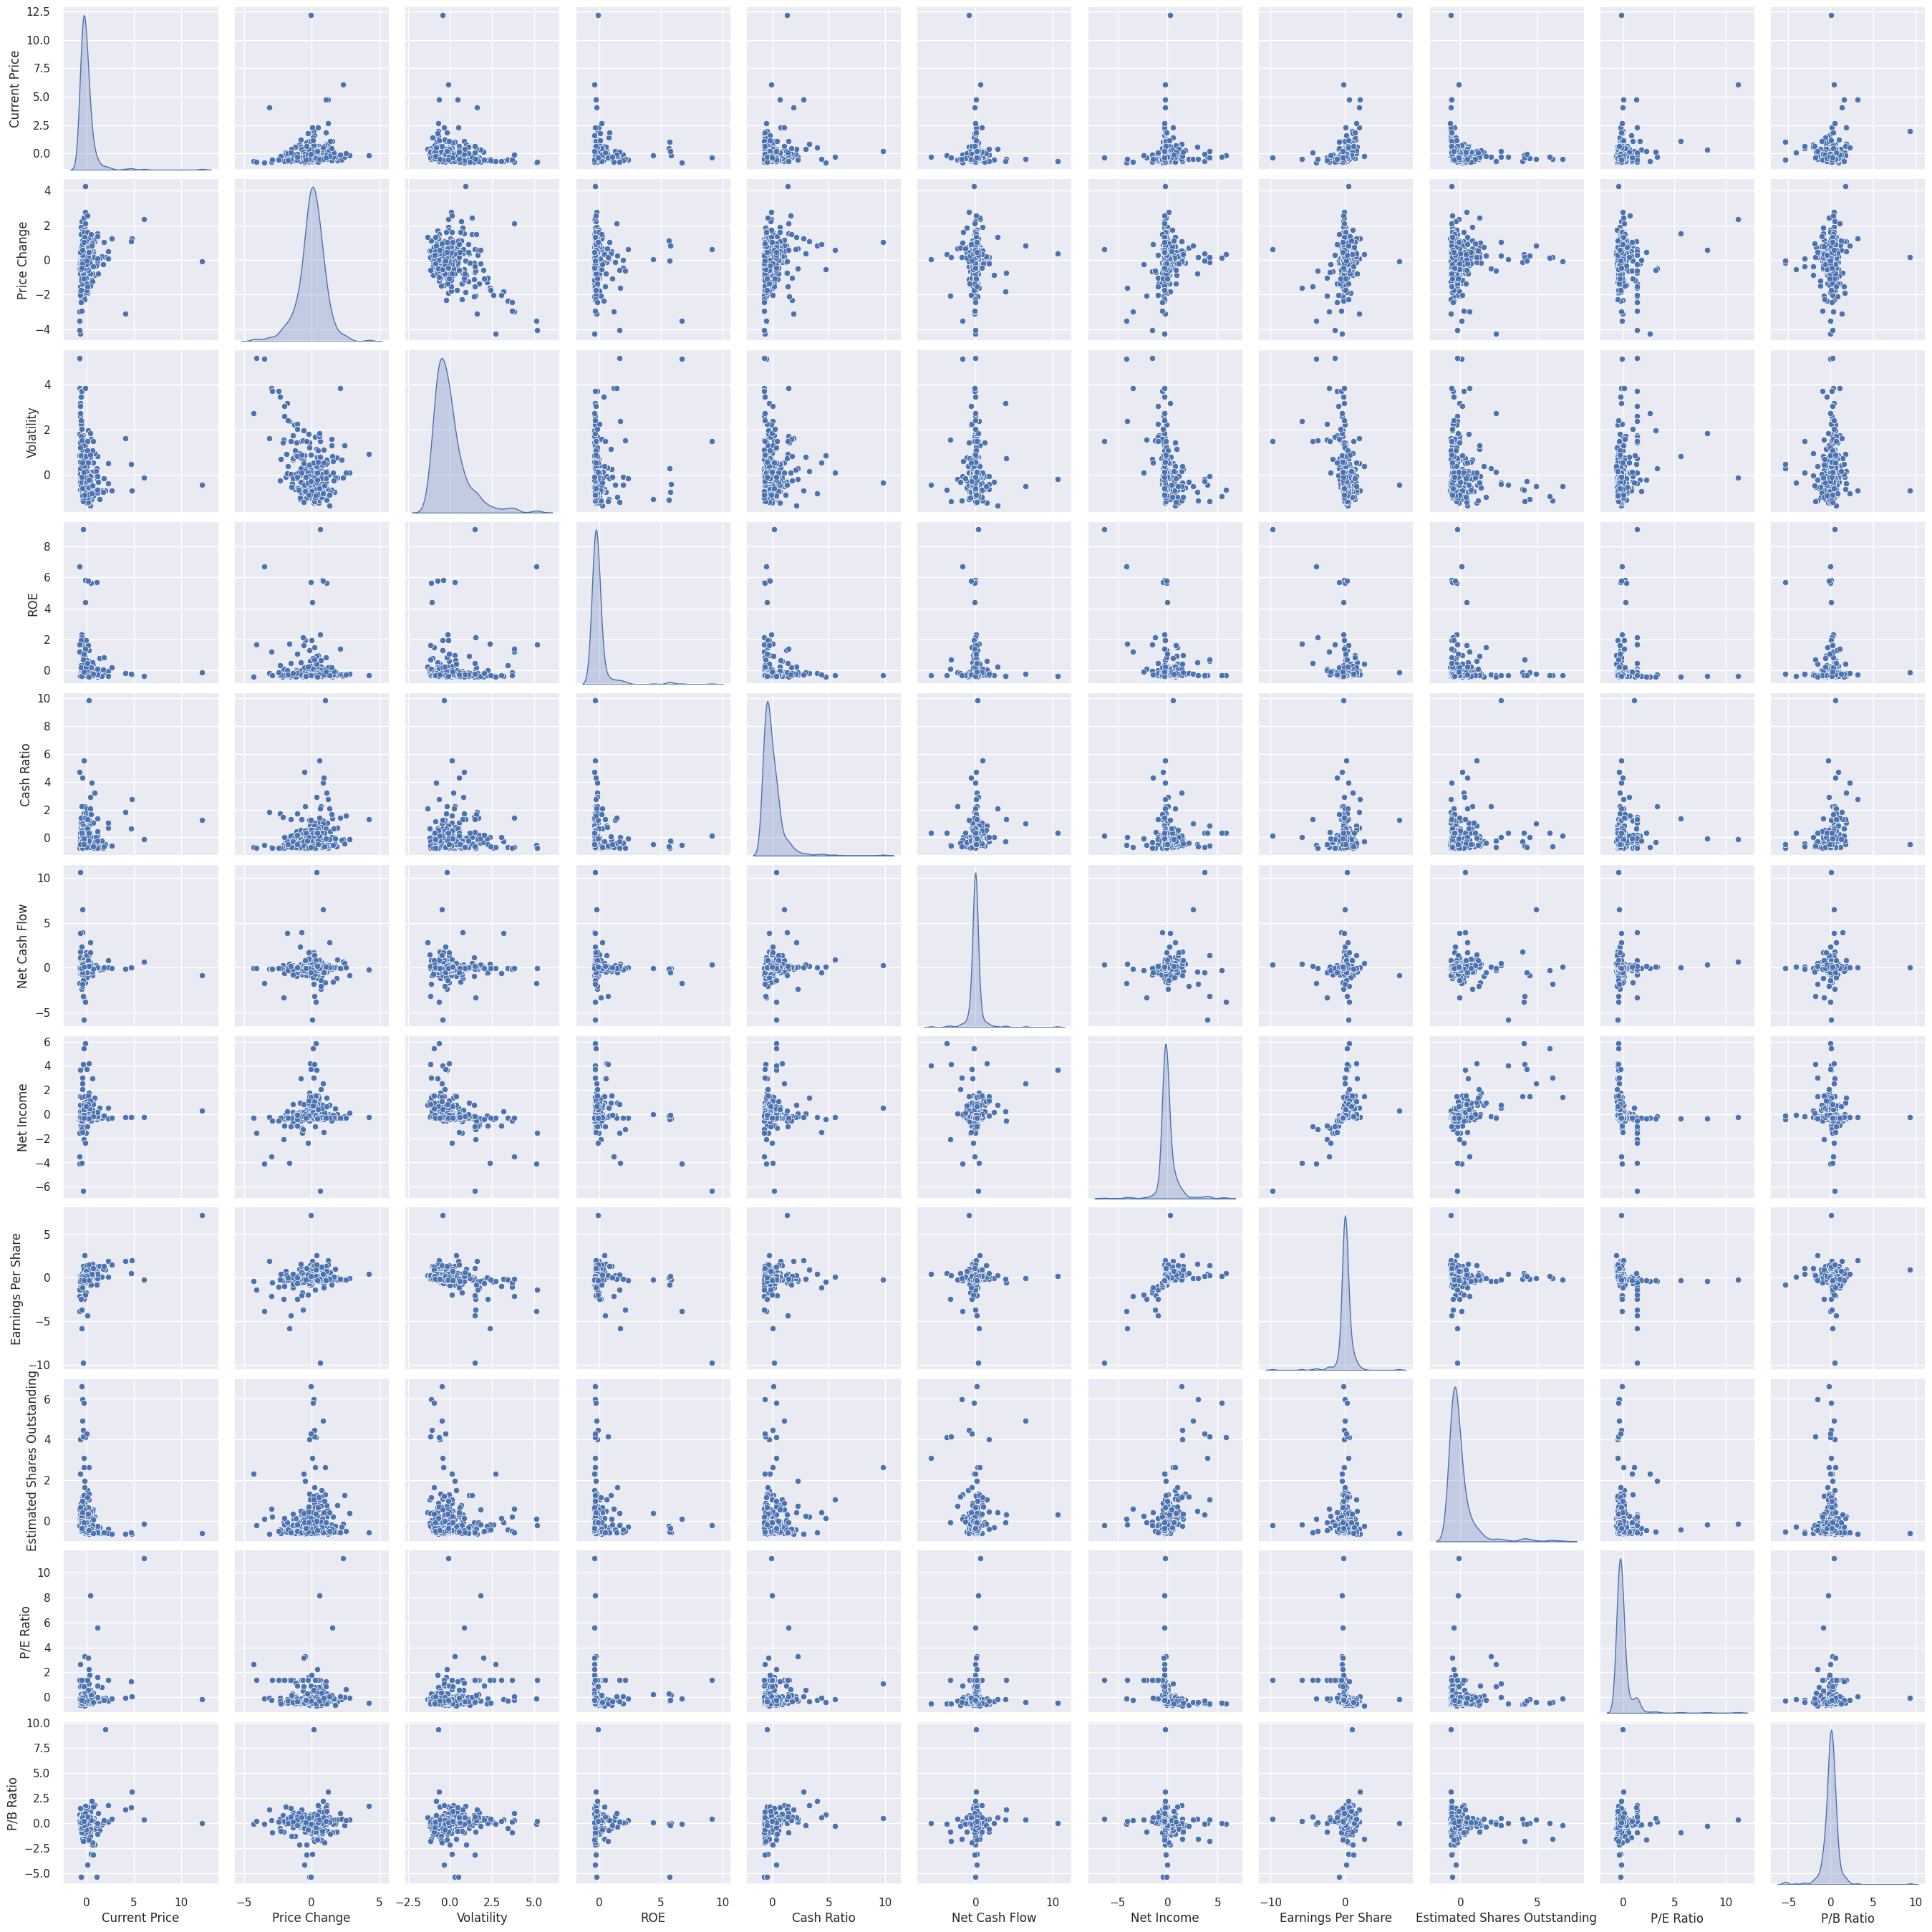

In [318]:
sns.pairplot(data=subset_scaled_df[num_col], diag_kind="kde")
plt.show()

**Observations**
* Bivariate analysis is cosistent with the outcome prior data scaling.
* All correlation measures have been already analyzed previously, so checks and deep dive will not be performed for scaled data as results will be the same.

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1804670329624374
Number of Clusters: 5 	Average Distortion: 2.1225218310422096
Number of Clusters: 6 	Average Distortion: 2.052961494393823
Number of Clusters: 7 	Average Distortion: 2.0104137712833317
Number of Clusters: 8 	Average Distortion: 1.9629795757763853
Number of Clusters: 9 	Average Distortion: 1.9425620872755645
Number of Clusters: 10 	Average Distortion: 1.879132007035593


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

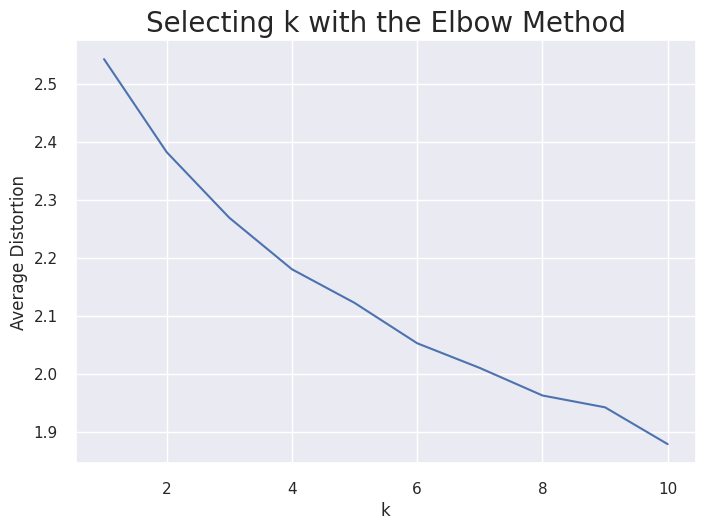

In [319]:
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**The appropriate value of k from the elbow curve seems to be between 5 and 8.**

### Let's check the silhouette scores

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.45547866229080475
For n_clusters = 4, silhouette score is 0.45624300420718716
For n_clusters = 5, silhouette score is 0.40897002248061487
For n_clusters = 6, silhouette score is 0.41167484007618566
For n_clusters = 7, silhouette score is 0.4006836383736989
For n_clusters = 8, silhouette score is 0.4089925983528137
For n_clusters = 9, silhouette score is 0.4167597464807983
For n_clusters = 10, silhouette score is 0.14720853124218916


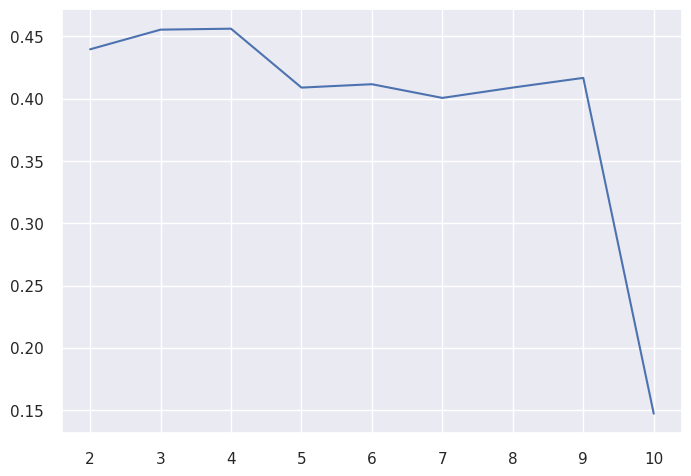

In [320]:
sil_score = []
cluster_list = list(range(2, 11))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From the silhouette scores, it seems that 3 or 4 is a good value of k.; we will check also for 5 and 6**

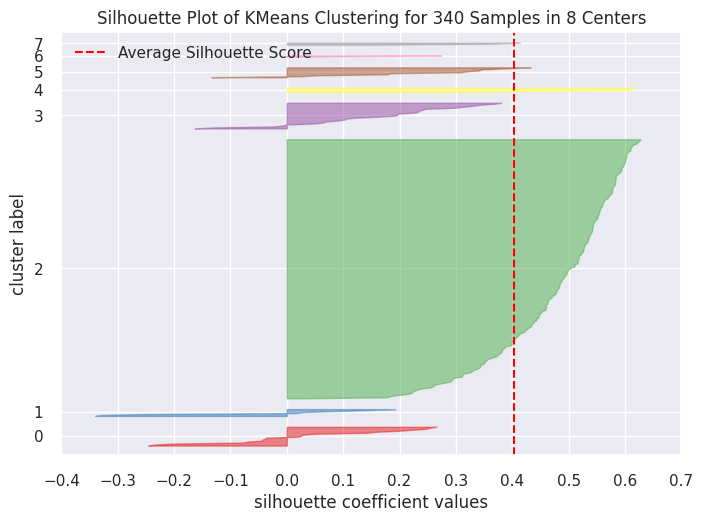

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [321]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

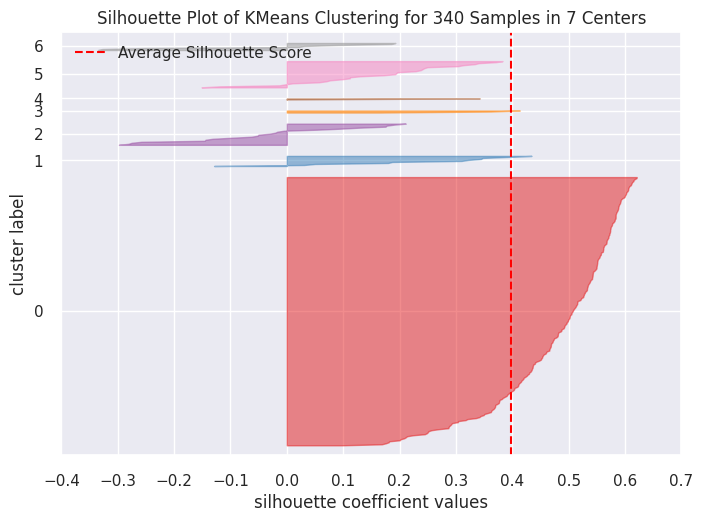

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [322]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

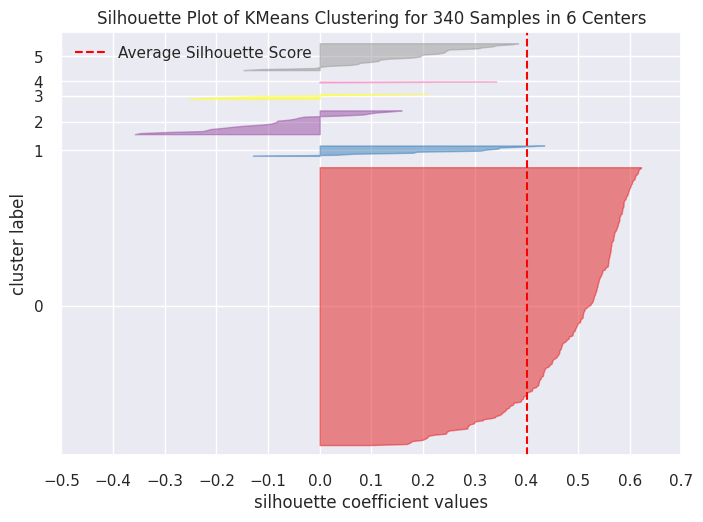

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [323]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

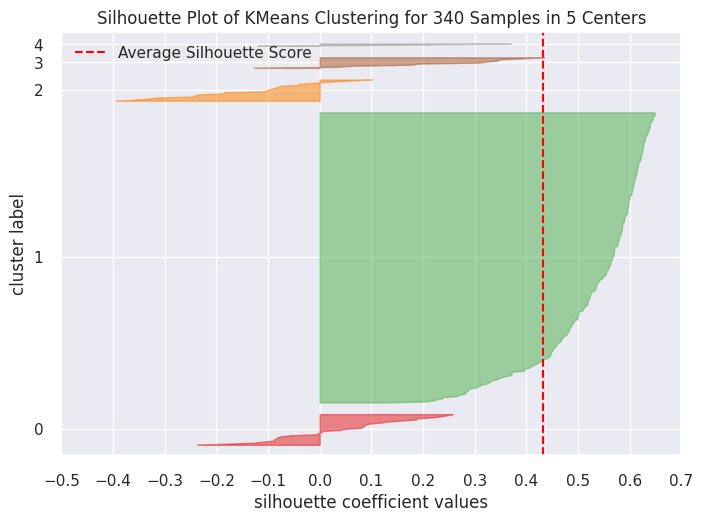

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [324]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

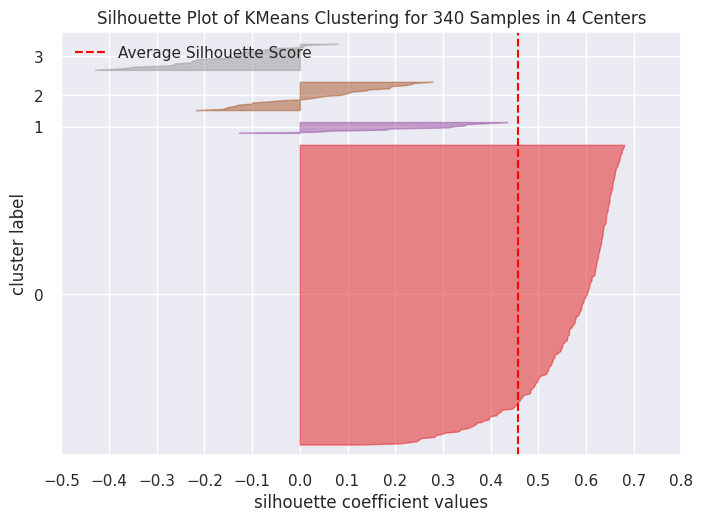

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [325]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

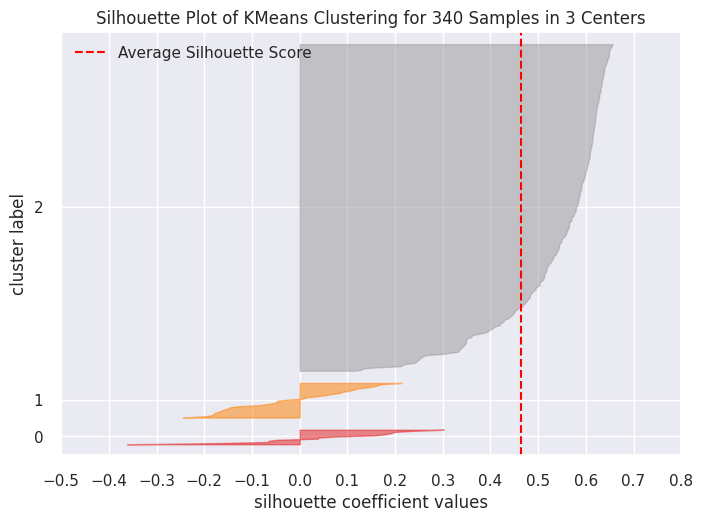

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [326]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

### Selecting final model

**Let's take 8 as the appropriate no. of clusters as the silhouette score is high enough and k is between the expected range mentined on elbow analysis.**

In [327]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(random_state=0)

In [328]:
# adding kmeans cluster labels to the original dataframe
subset_scaled_df["K_means_segments"] = kmeans.labels_
df["K_means_segments"] = kmeans.labels_

## Cluster Profiling - KMeans

In [329]:
cluster_profile = df.groupby("K_means_segments").mean()

In [330]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["GICS Sector"].count().values
)

In [331]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

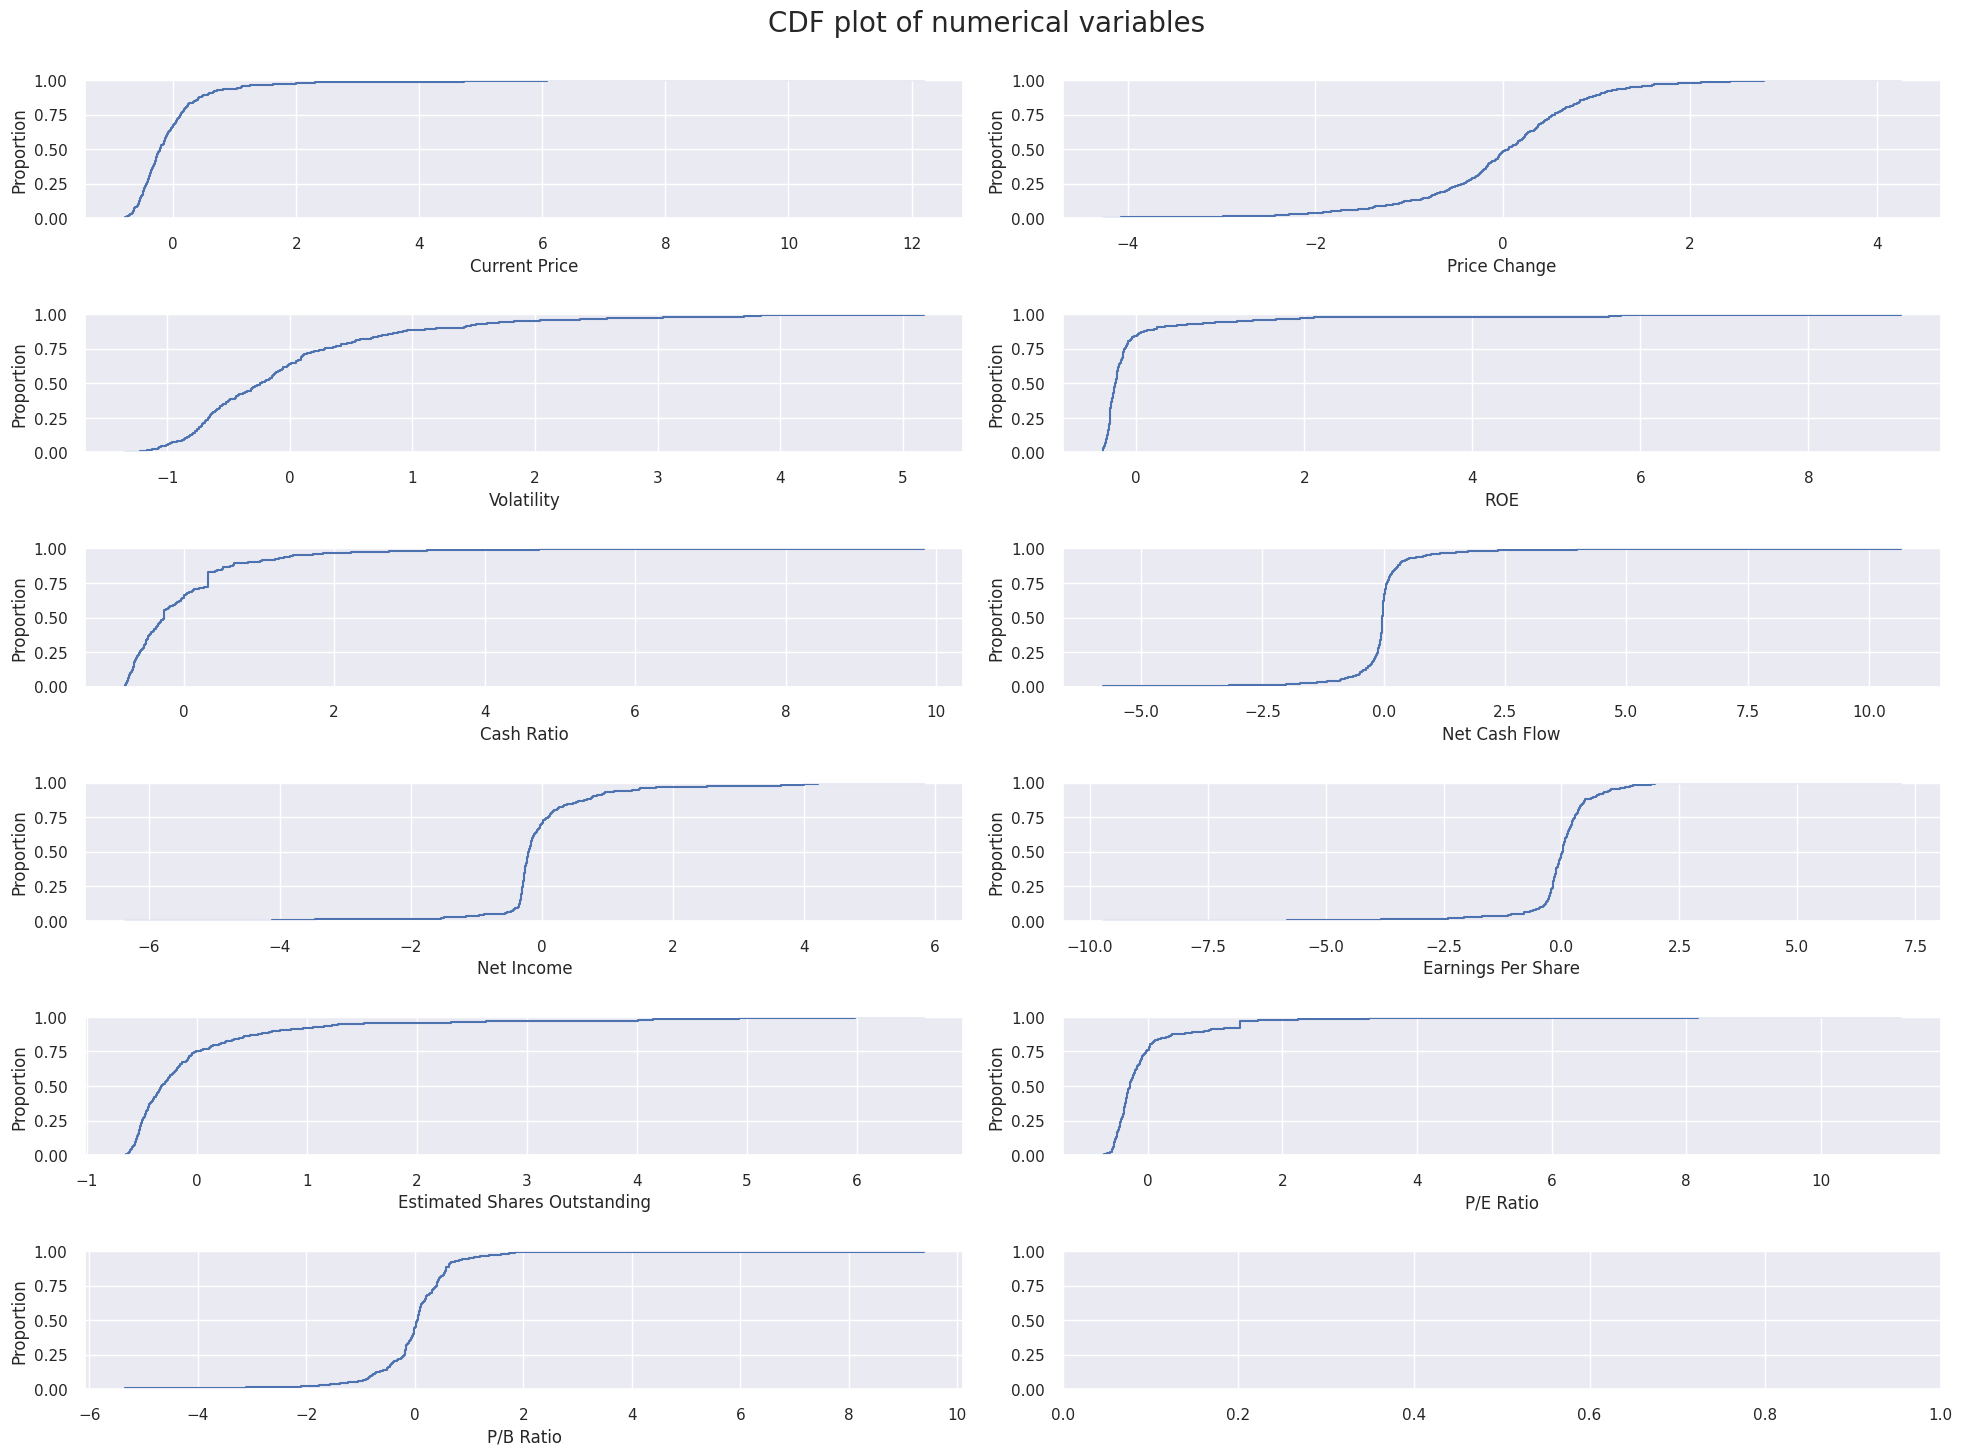

In [332]:
fig, axes = plt.subplots(6, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(6):
    sns.ecdfplot(ax=axes[ii][0], x=subset_scaled_df[num_col[counter]])
    counter = counter + 1
    if counter != 11:
        sns.ecdfplot(ax=axes[ii][1], x=subset_scaled_df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

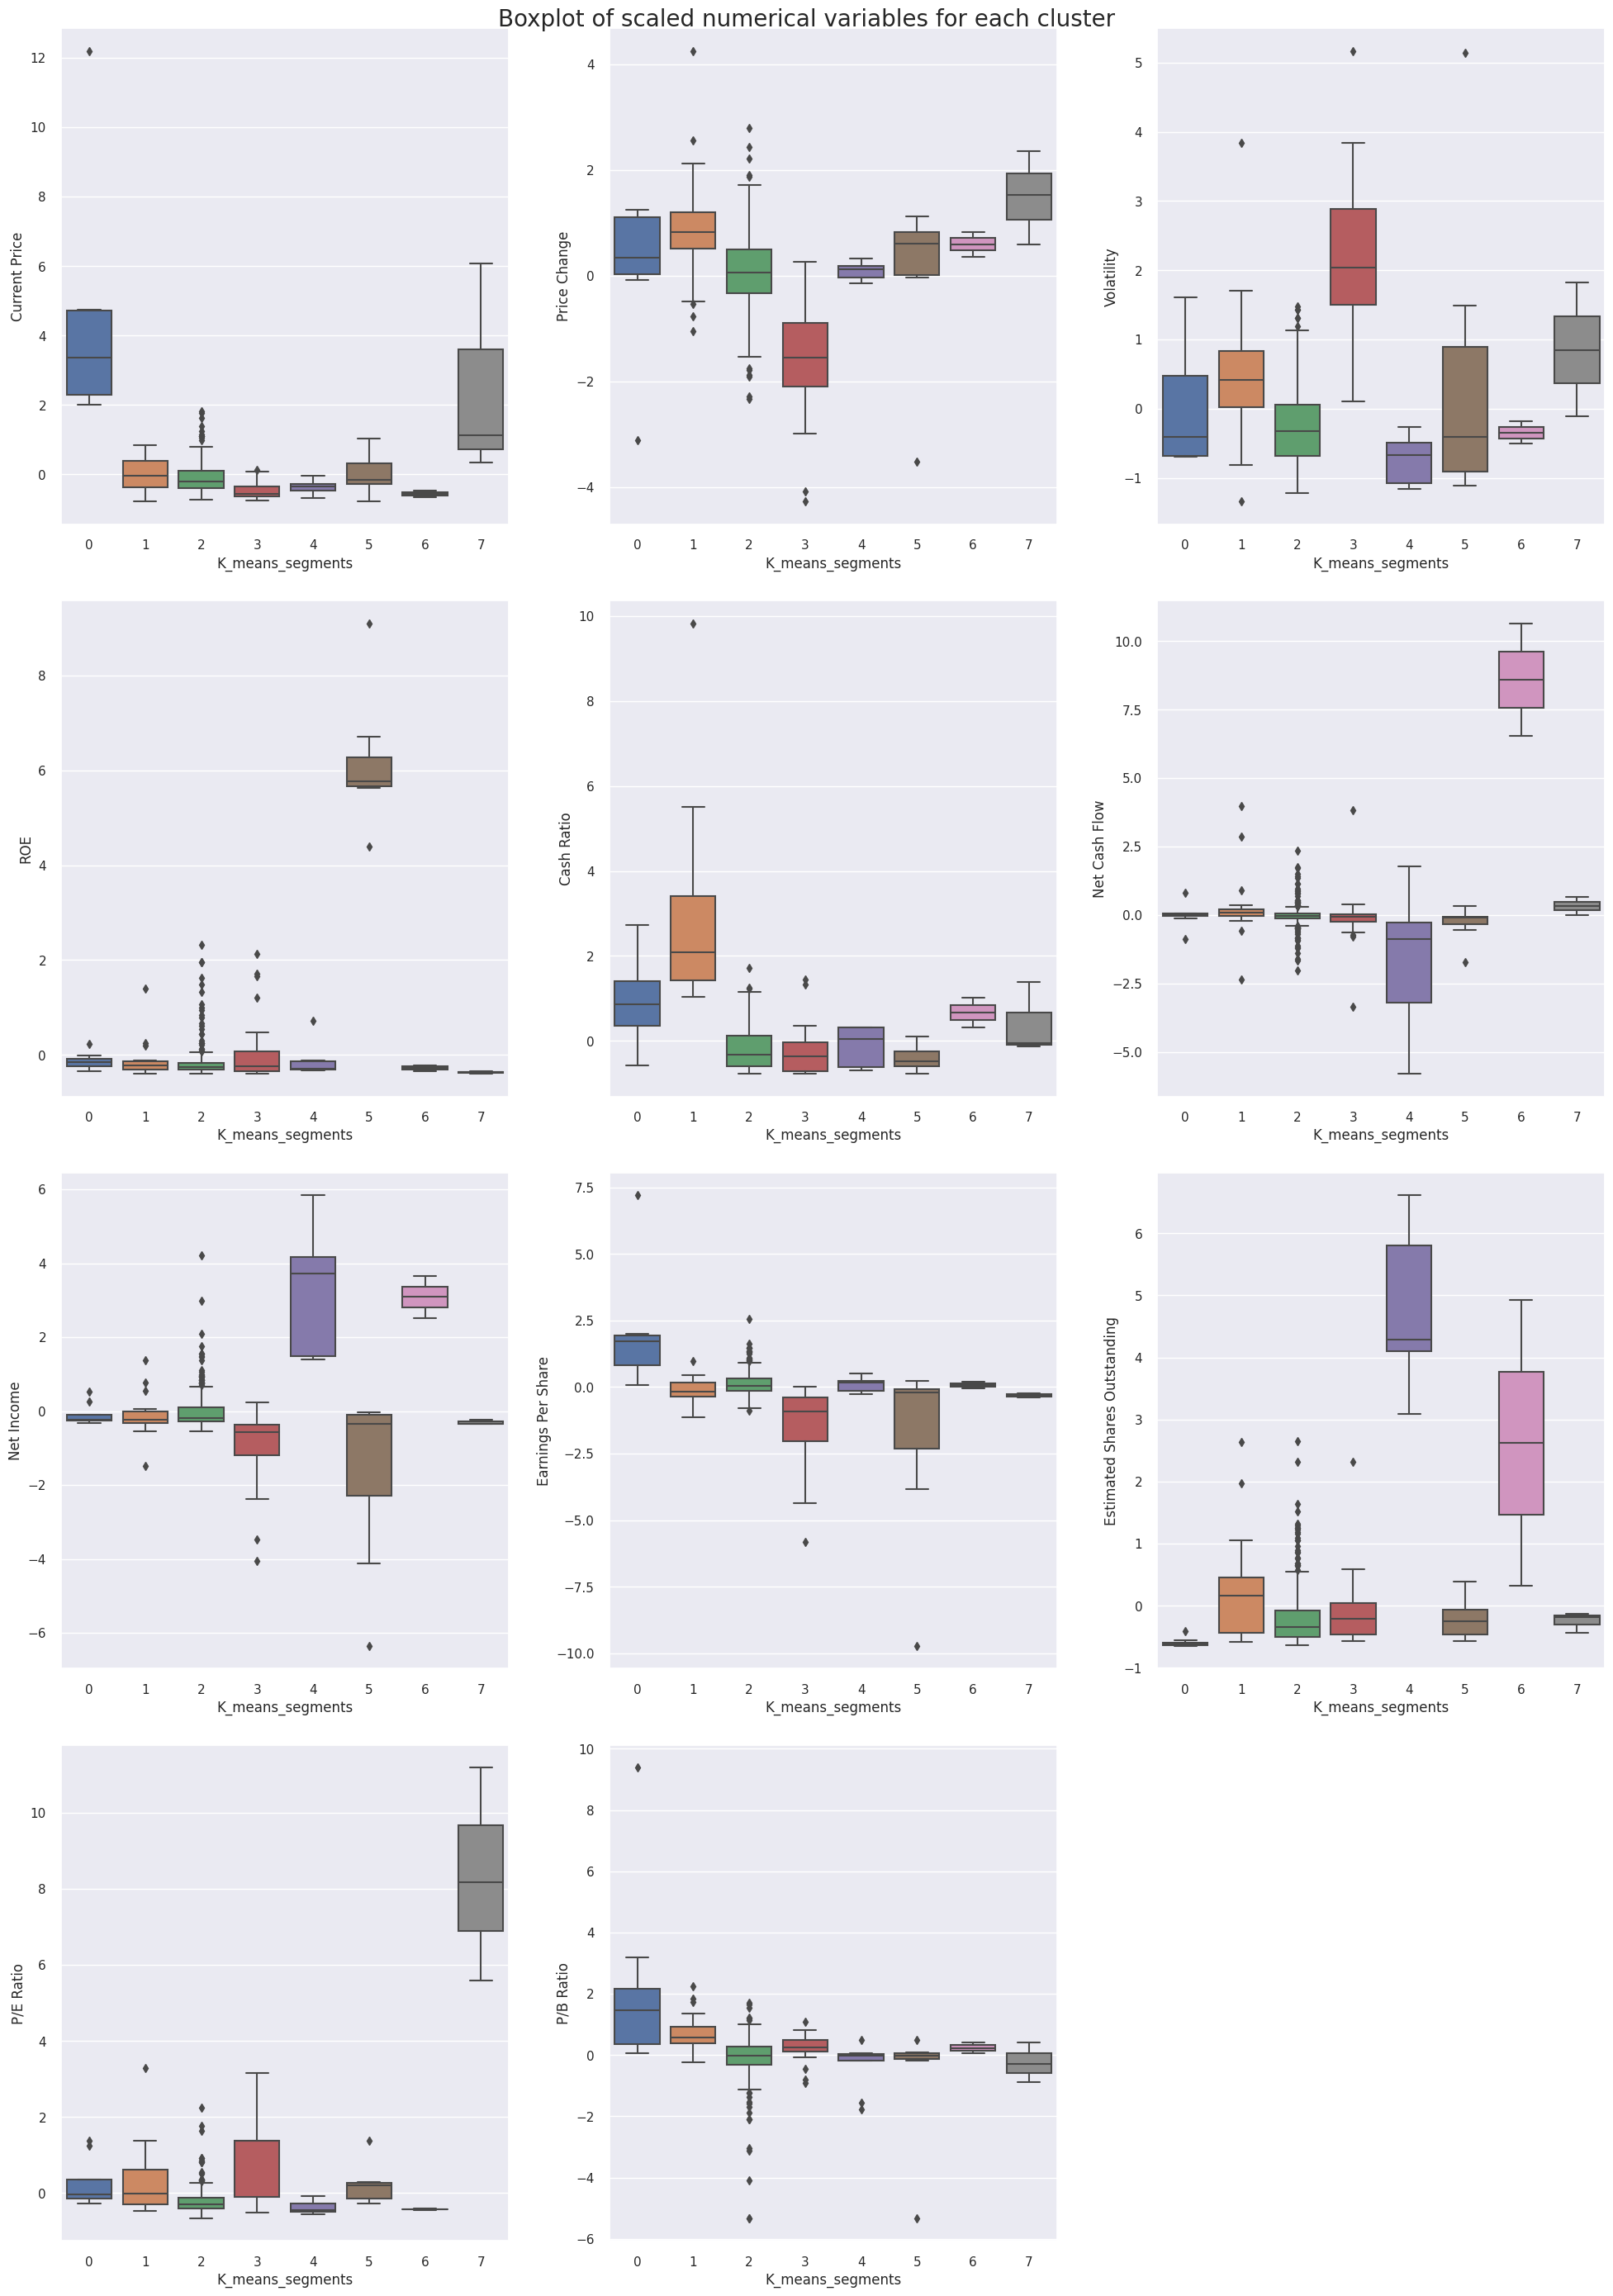

In [333]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=subset_scaled_df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

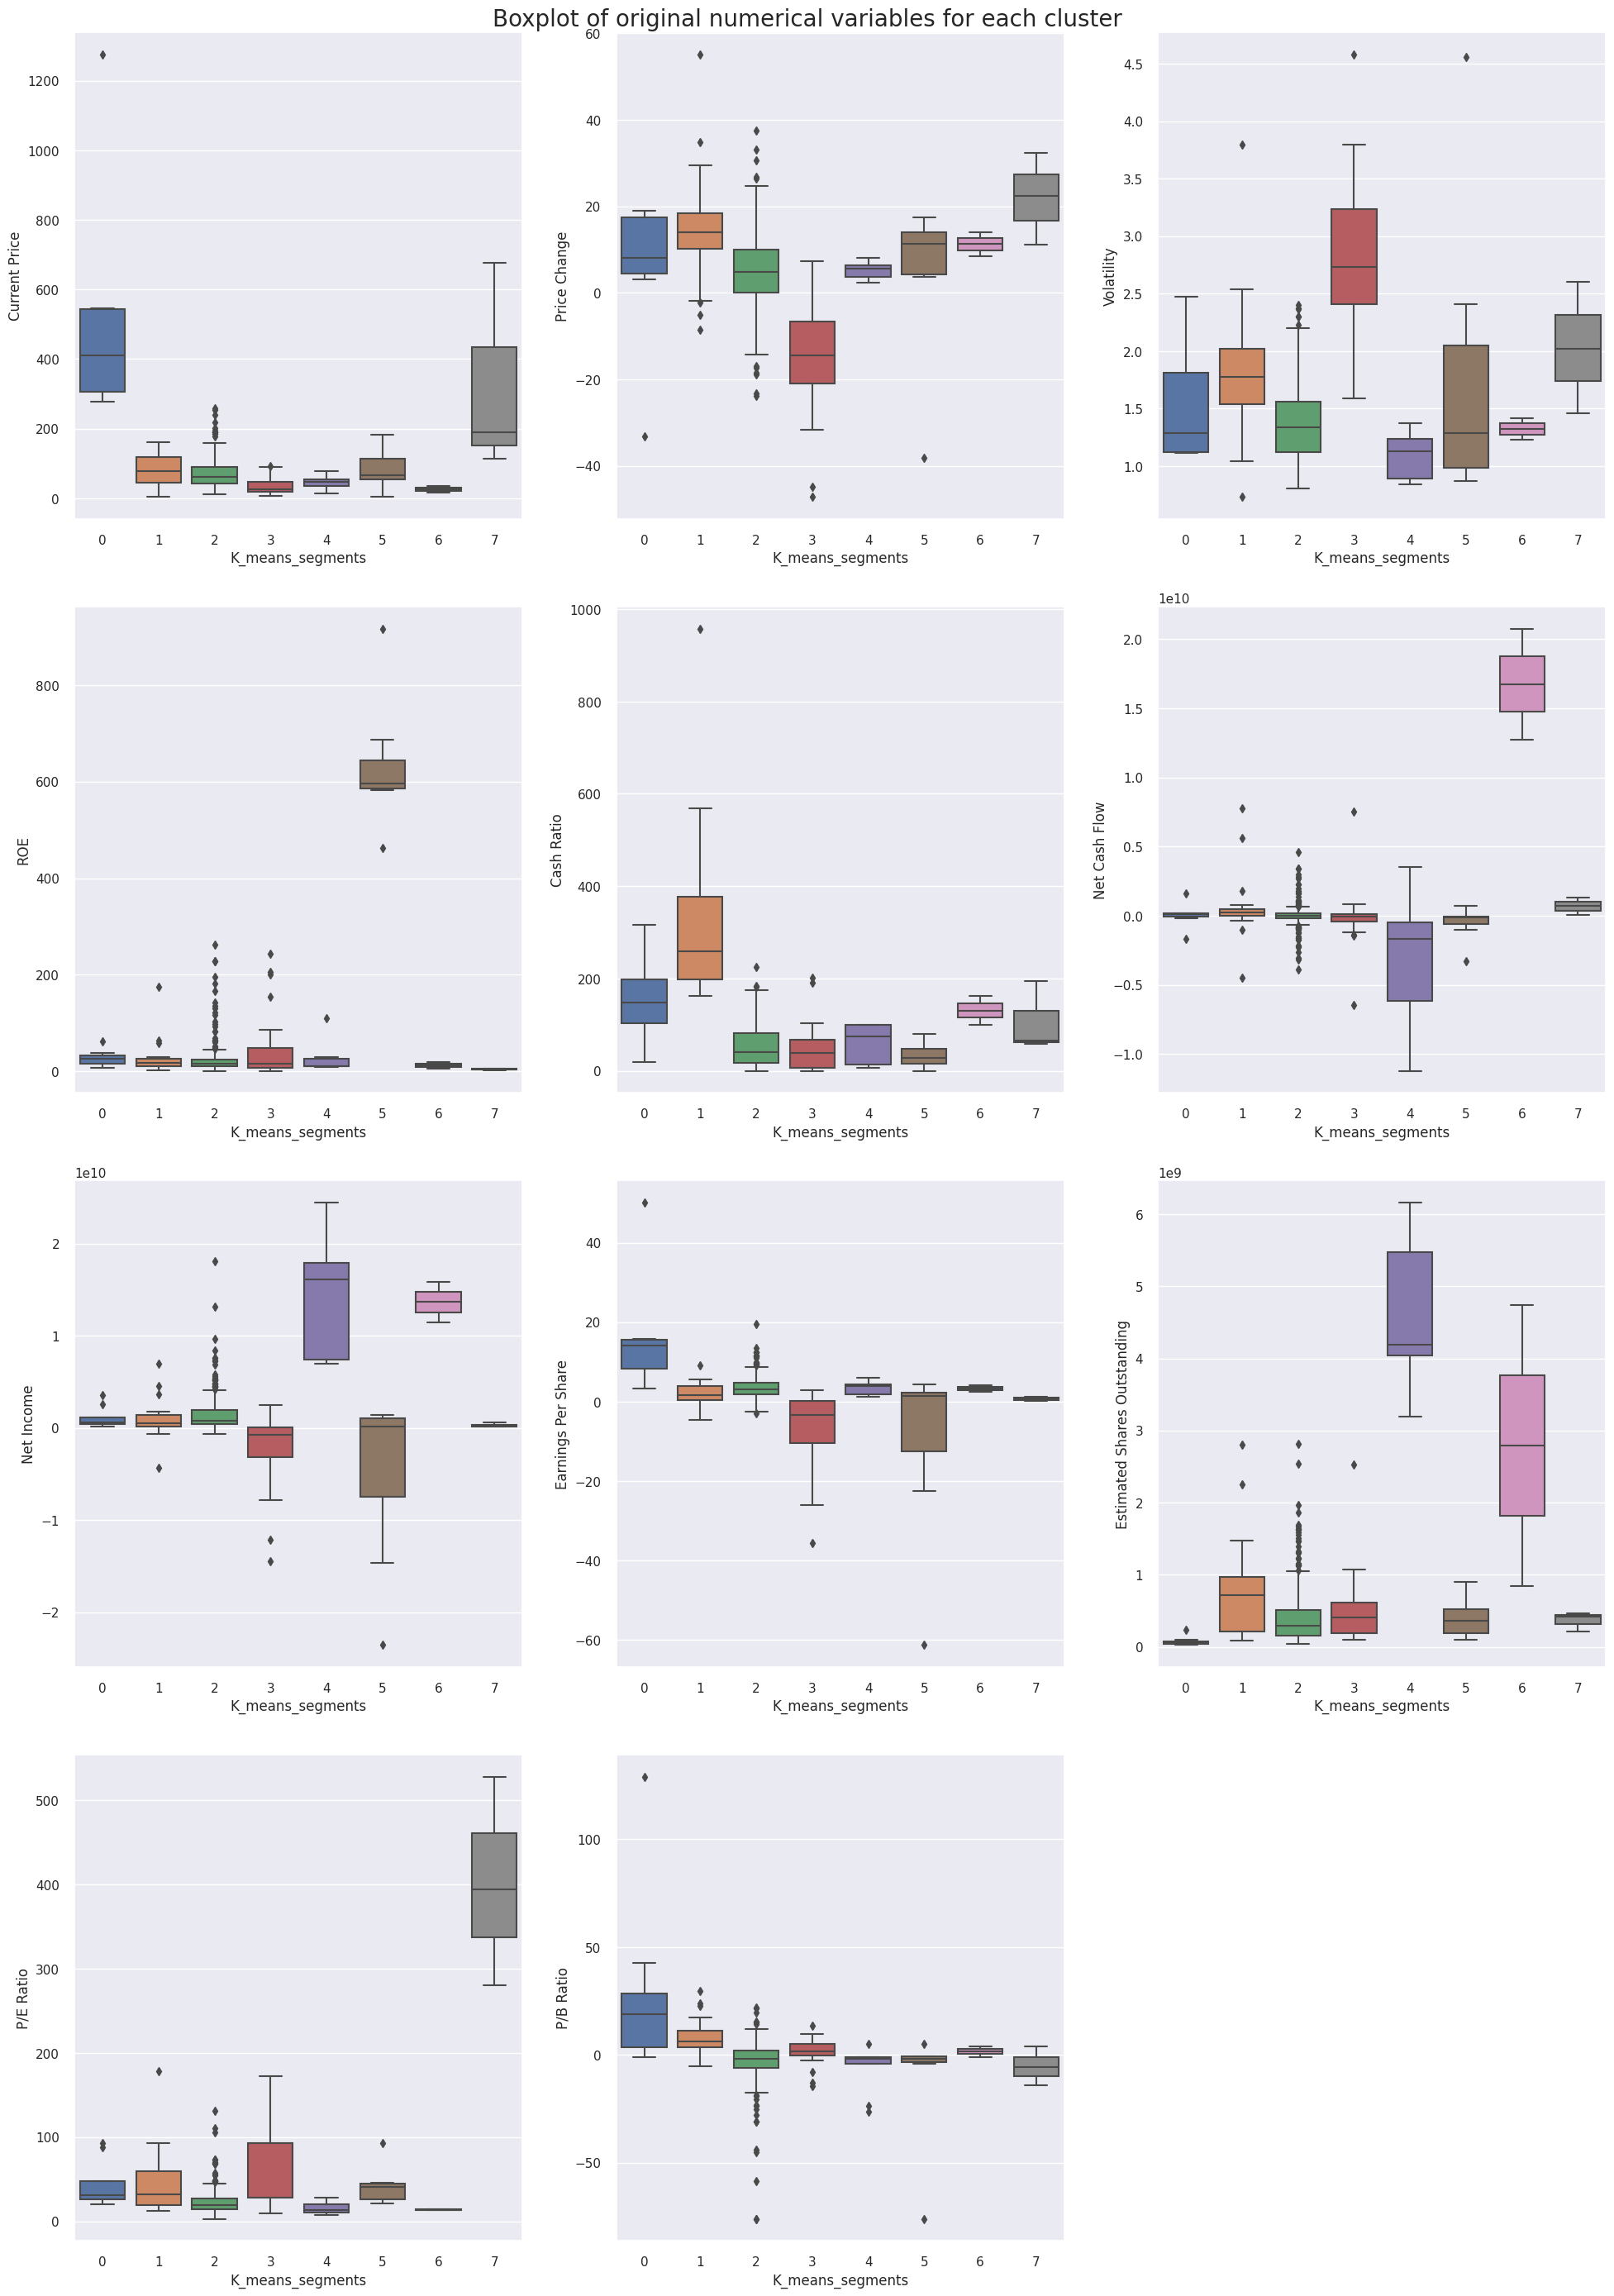

In [334]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

## Insights

**Cluster 0**:
- Has the highest average current stock prices
- Price change is moderated with a well defined range similar to the rest of clusters.
- Volatility is relatively low.
- Has a relatively low ROE, which wouldn't be ideal.
- Has a mild cash ratio and a low cashflow
- Average net income is very low.
- It has the highest earning per share, so this is a good indicator to invest.
- Low estimated shares outstanding and P/E ratio.
- It has the highest P/B Ratio.

**Cluster 1**:
    - Very similar to cluster 0.
- It has the highest cash ratio

**Cluster 2**:
- Very similar to cluster 0 and 1. Nothing special to mention.



**Cluster 3**:

- Very similar to clusters 0,1 and 2.
- It has a negative price change which would mean a drop in it stock price over the last 13 weeks.
- It has the high volatility.

**Cluster 4**:
- Very similar to clusters 0,1,2 and 3
- Is the one with the lowest volatility
- It has a very wide range of net cash flow.
- Is the one with the highest net income.
- Earnings per share are low because is the cluster with the highest estimated shares outstandint.

**Cluster 5**:
- Very similar to clusters previous clusters
- Is the one with the highest ROE but mostly negative net income thus negative earnigs per share.

**Cluster 6**:
- Very similar to clusters previous clusters
- Is the one with the highest net cash flow.

**Cluster 7**:
- Very similar to clusters previous clusters
- Is the one with the higest P/E ratio and highest postive price change.

#### Let's compare Cluster vs GICS Sector

In [335]:
pd.crosstab(df.K_means_segments, df['GICS Sector']).style.highlight_max(
    color="lightgreen", axis=0
)

**Observations**

- KMeans doesn't seems to separate well the clusters, as we can observe most of them have very similar characteristics and very little differences.
- It is hard to provide a proper profiling using Kmeans, so further checks and verifications need to be done in order to improve the model.

## Hierarchical Clustering

### Checking Cophenetic Correlation

In [336]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
#linkage_methods = ["single", "complete", "average", "weighted"]
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9345526329379537.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8452929808109975.
Cophenetic correlation for Euclidean distance and average linkage is 0.9495821453768725.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9156327901892896.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9177074000650272.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8031917698414331.
Cophenetic correlation for Chebyshev distance and average linkage is 0.93724310450871.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8906157116060892.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.930641788686031.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.793219648304781.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9371656111212016.
Cophenetic correl

In [337]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9495821453768725, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [338]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9345526329379537.
Cophenetic correlation for complete linkage is 0.8452929808109975.
Cophenetic correlation for average linkage is 0.9495821453768725.
Cophenetic correlation for centroid linkage is 0.9471718133891771.
Cophenetic correlation for ward linkage is 0.7095968268387225.
Cophenetic correlation for weighted linkage is 0.9156327901892896.


In [339]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9495821453768725, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Checking Dendrograms

**Let's see the dendrograms for the different linkage methods.**

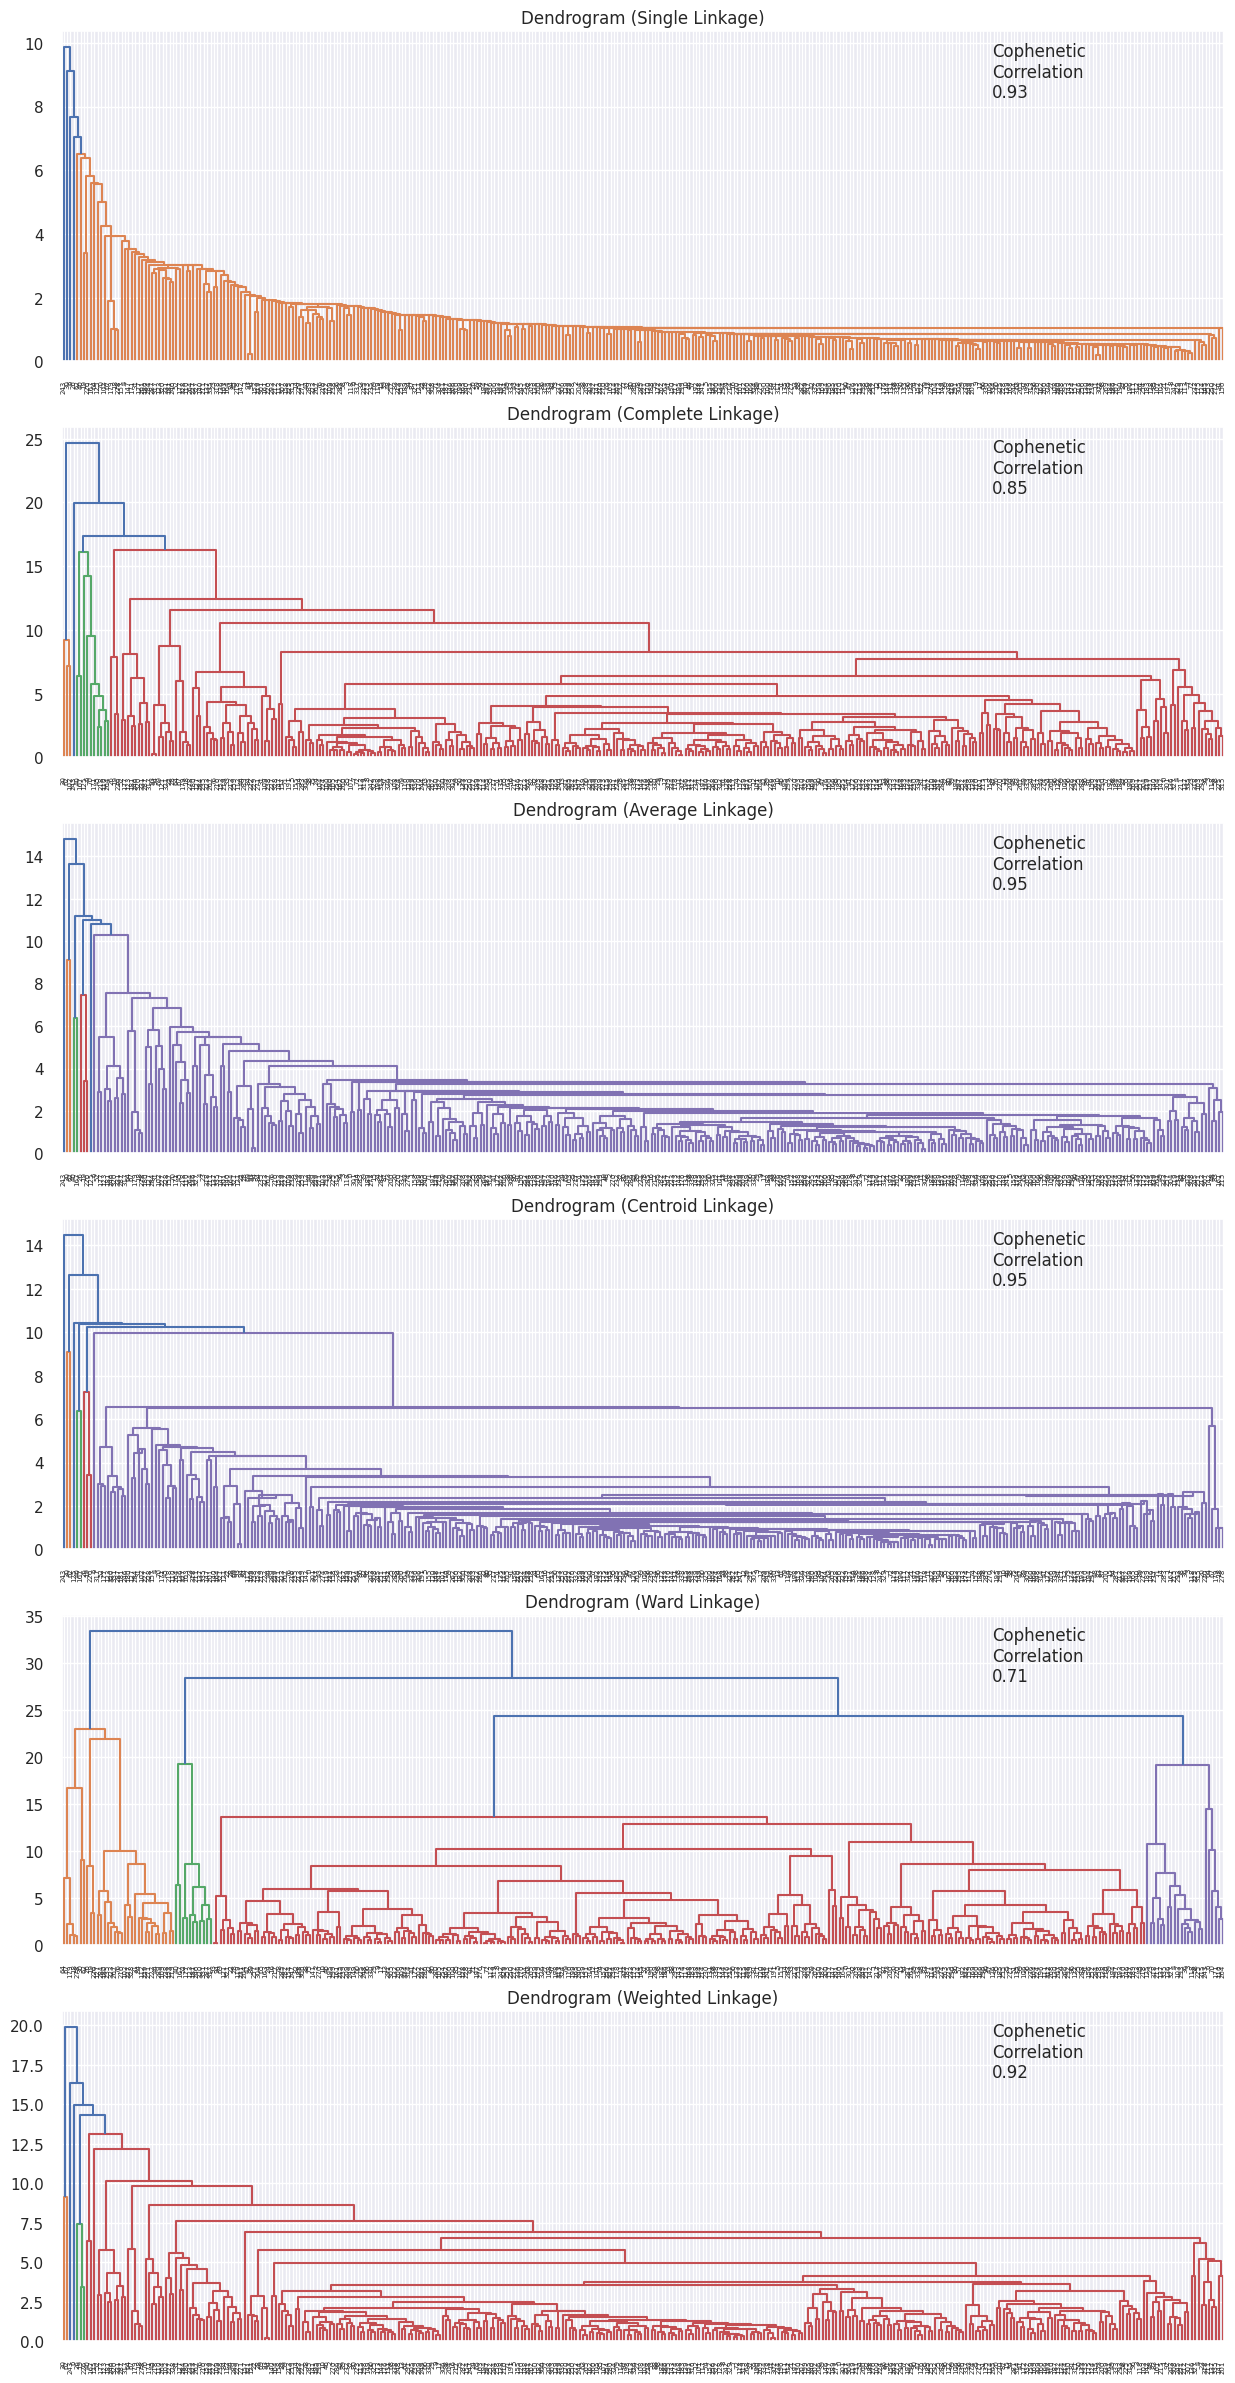

In [340]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average, centroid and single linkage methods.
- We will proceed with Average linkage as it has the best cophenetic coeficient
- 8 seems to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating Model using sklearn

In [341]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [342]:
#setting clusters on original dataset
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [343]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [344]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["GICS Sector"].count().values
)

In [345]:
# let's see the names of the companies in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myer

**We see that there is 1 cluster with 1 company, 2 with 2 companies and 1 with 3 companies, the rest of companies are set to cluster 0. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 5 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

## Creating Final Model

In [346]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [347]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [348]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [349]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["GICS Sector"].count().values
)

In [350]:
# let's see the names of the companies in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Security"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 273 companies in cluster 3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp

**Now the clusters seem to have more variability.**

In [351]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

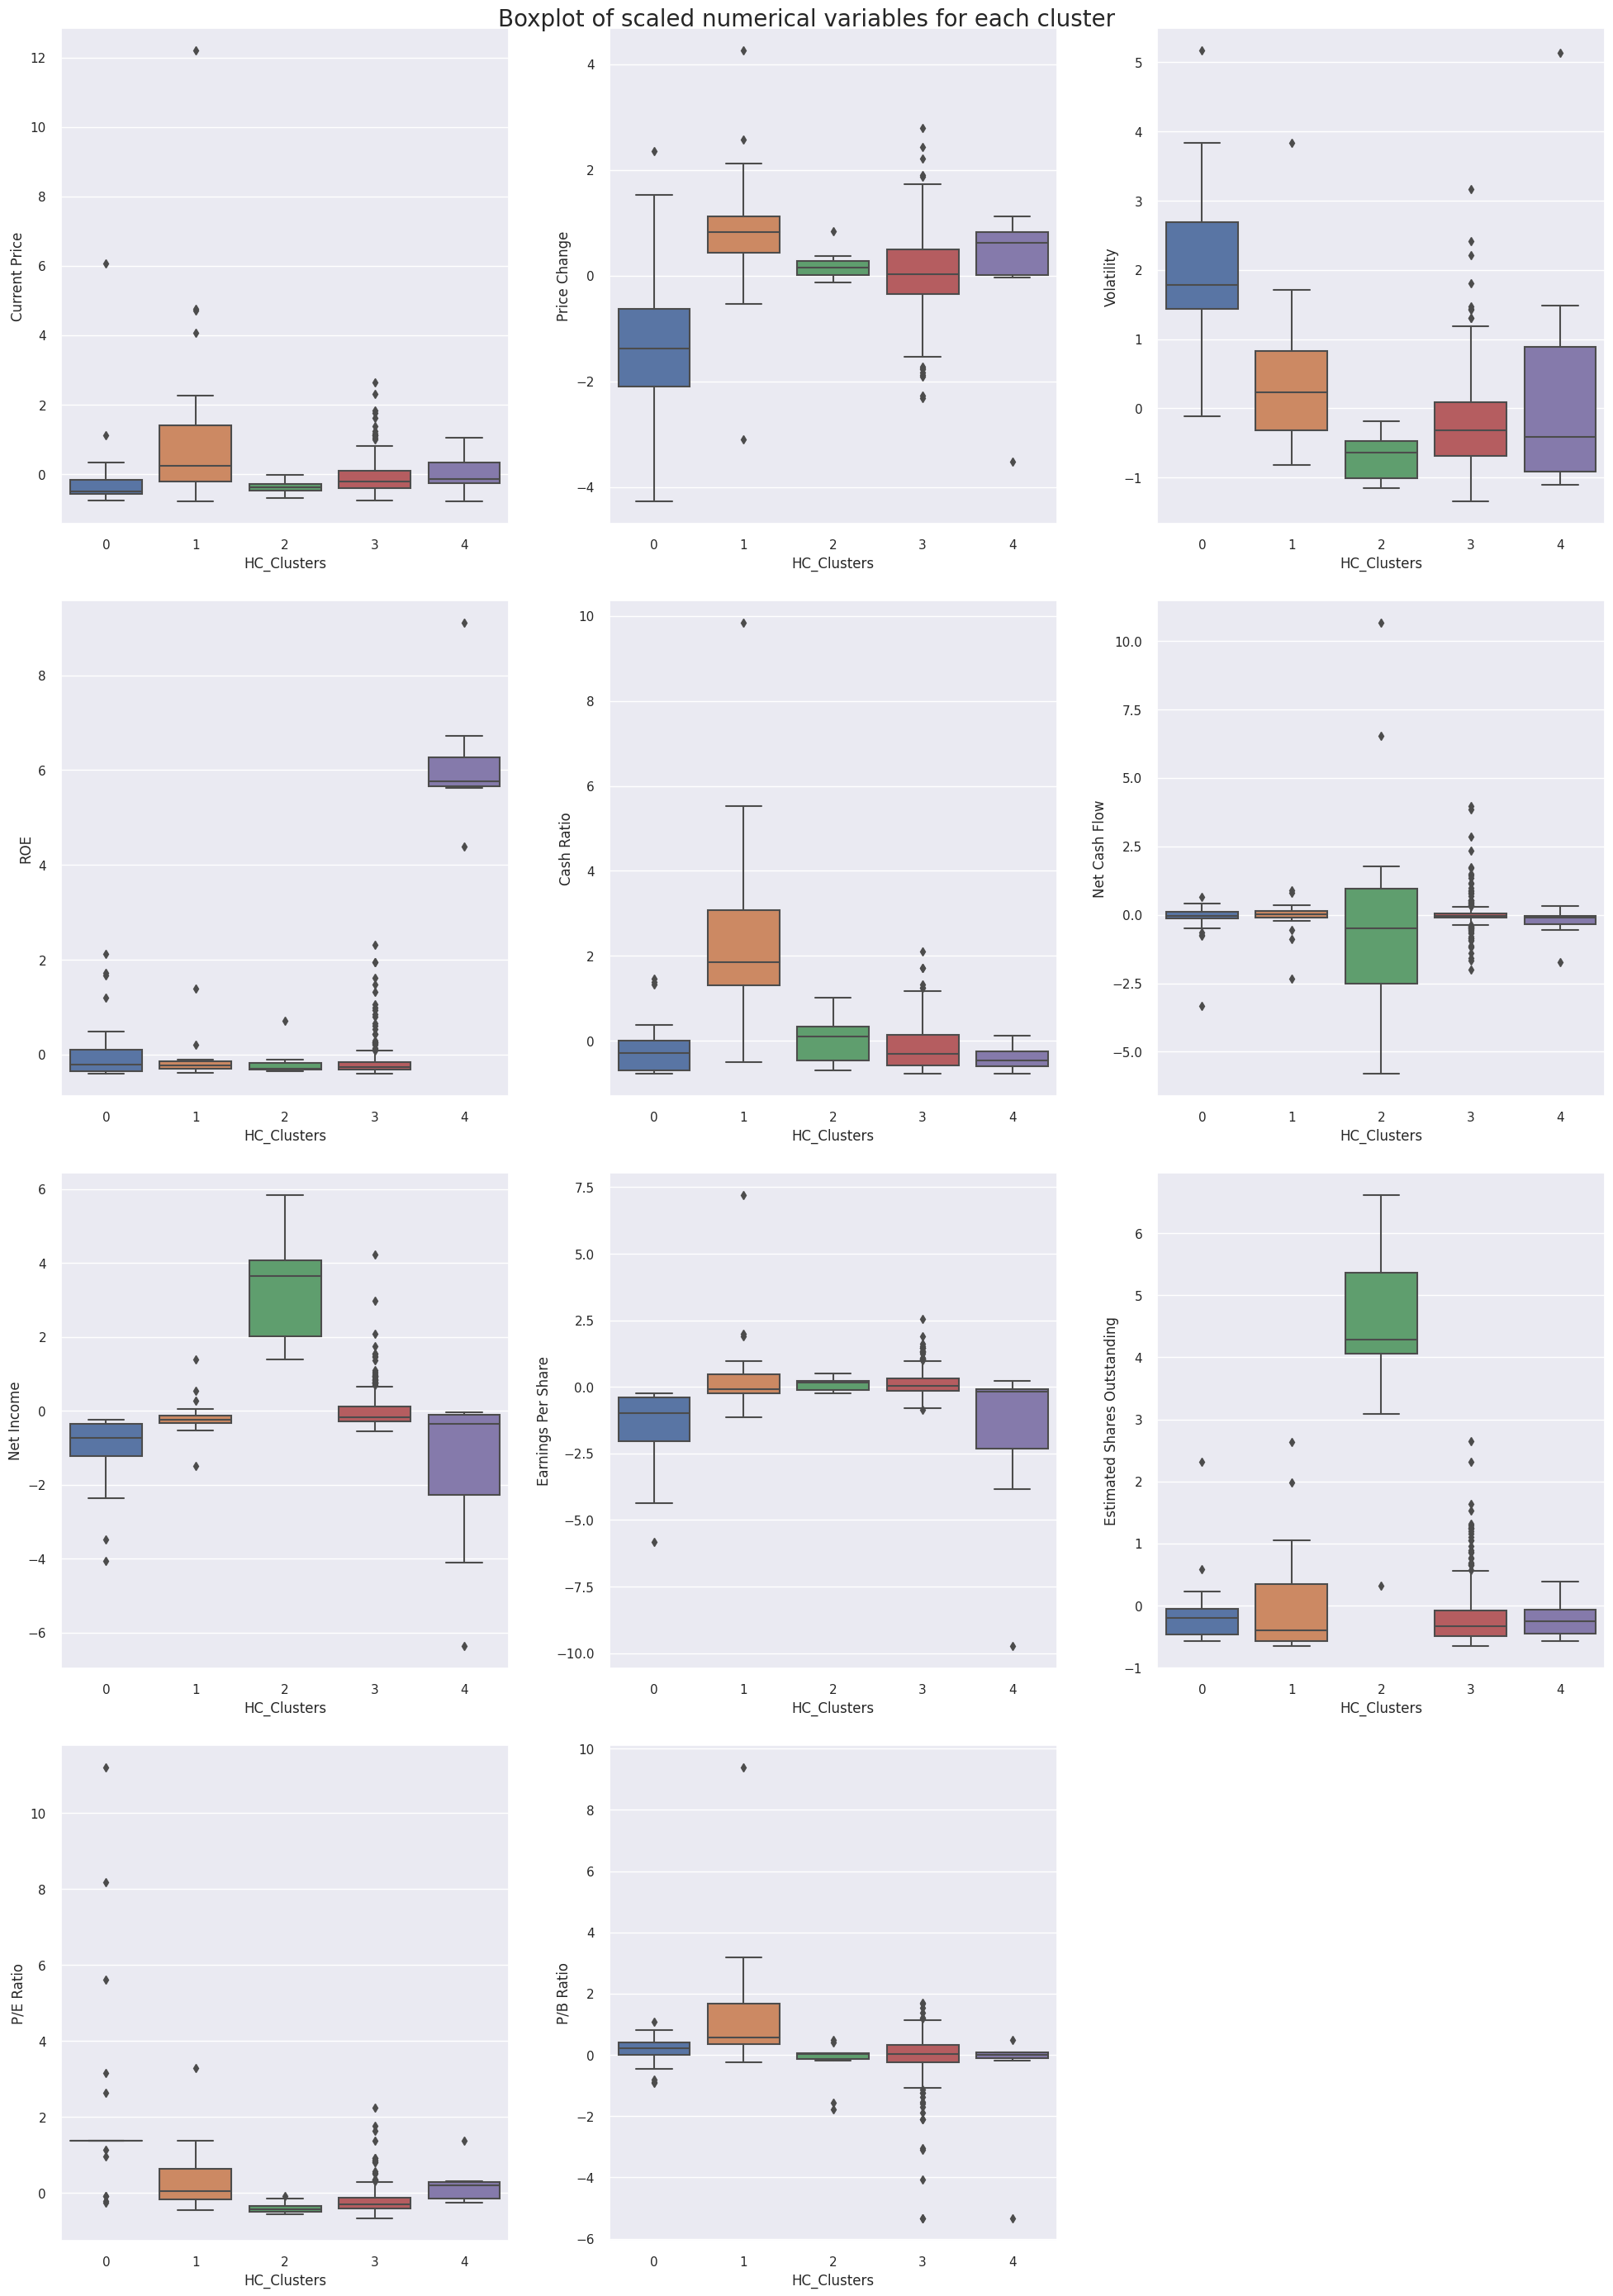

In [352]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=subset_scaled_df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

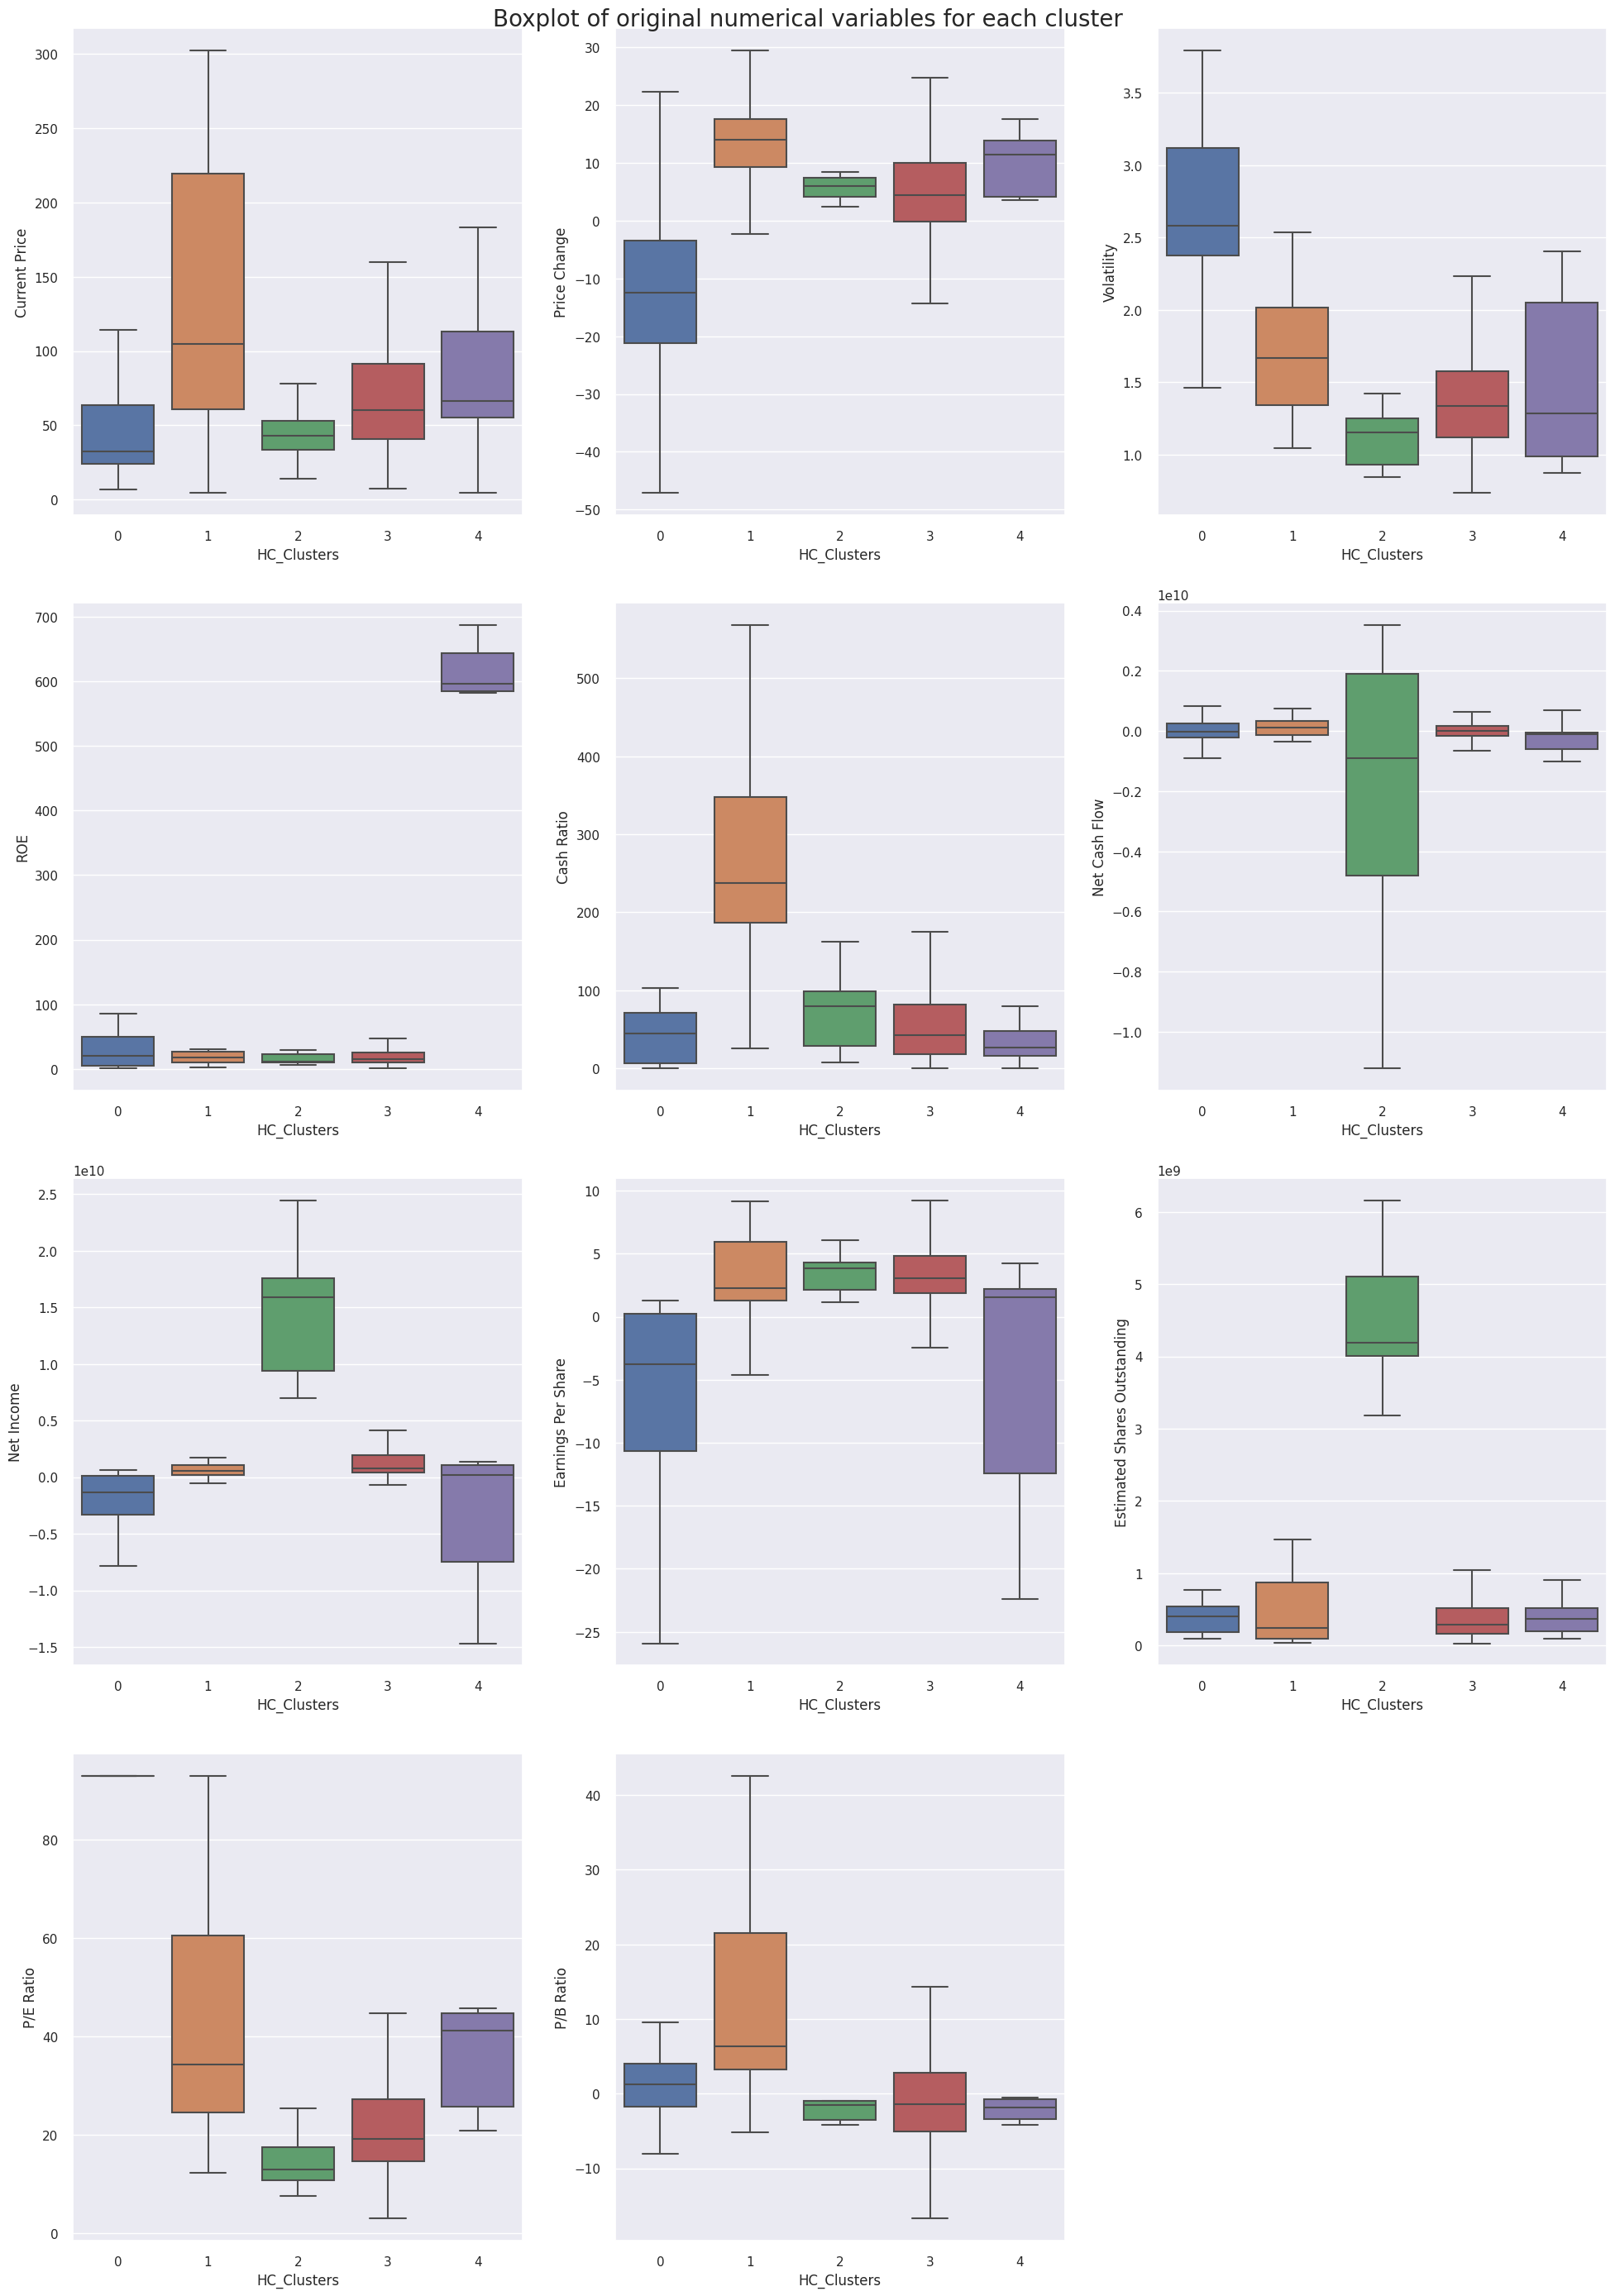

In [353]:
#Outliers will be removed for a better visibility
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df, x="HC_Clusters", y=variable, showfliers = False)

plt.tight_layout(pad=2.0)

### Insights

We will look into clusters 0, 2, and 5 only because the other clusters have only 1 or 2 countries in them.

- **Cluster 0**
   - There are 26 companies in this cluster.
   - At this stage, it would represent high risk companies due the uncertainty and potential inconsistencies in what the data says like good ROE with negative income and low P/B ratio. Further checks with data owners might be needed to clarify about the inconsistencies.
   - It has the lowest average stock price, nonetheless at least 50% of the companies have stock price>=30, it shows a high volatility that causes sudden changes in the stock price where it could improve or it could drop.
   - It has a good average ROE, nonetheless it has negative net income and negative earnings per share.
   - It has the highest P/E average value and average low P/B ratio.
   - In a nutshell this would be a risky decision to invest on this companies since they are relatively unstable. We might need to understand first the the reason of negative incomes and low P/B ratio cases.


- **Cluster 1**
   - There are 23 companies in this cluster.
   - This represents a low risk investment companies that are ideal to invest.
   - It has the highest average stock price. At least 50% of the companies in this cluster show a stock price superior to 100.
   - It has a mild volatility, nonetheless the price changes ranges mainly on positive values and 50% it increases aprox 12%.
   - It shows a relatively low ROE and at least 75% of the cases earnigs per share>=2 and net positive income relatively stable. It also shows a high liquidity and a very good P/B and P/E ratios.


- **Cluster 2**
   - There are 11 companies in this cluster.
   - This represents also low risk investment companies that are atractive due its high stock prices, low price changes and high net incomes. Nonetheless, P/B values are concerning so they might need to be verified.
   - It presents an acceptable stock price with the lowest volatility thus a very small price change range on the positive values.
   - It shows an average trend value of ROE with the highest net income and a good earning per share(both metrics ranges positive).
   - It also shows the highest estimated shares outstanding.
   - P/E Ratio is the lowest but it ranges positive and values are acceptable. P/B is the lowest with only negative values.

- **Cluster 3**
   - There are 273 companies in this cluster.
   - This represent medium risk investment companies where P/B ratio might need to be investigated.
   - Companies show a good stock price where at leat 50% of them have a stock price>=60.
   - It shows a significant volatility where prices could drop up to 15%; there is also a chance of prices raise to a max of 25%.
   - It shows average trend ROE where at leats 75% of the companies have a positive net income.
   - Companies also show a good cash ratio.
   - P/E ratio is good, however P/B ratio could take negative values in at least 50% of the cases which is not ideal.


- **Cluster 4**
   - There are 7 companies in this cluster.
   - It would represent initially high risk companies, as they have a high stock price and ROE with a negative income and the lowest P/B ratio.
   - It accounts with the second highest average stock price. At least 50% of the cases >=60 with a low average volatility and a high positive stock prices increase which is good.
   - It presents a very high ROE where at least 50% of the companies have a negative net income.
   - Cash flow is relatively good, even though is the lowest.
   - It presents the highest average P/E ratio but the lowest average P/B ratio.


## K-means vs Hierarchical Clustering

You compare several things, like:
- **Which clustering technique took less time for execution?**
KMeans was a bit faster. Dendograms was the most time consuming part for hierarchical clustering, nonetheless because the dataset is very small, execution time difference is very small.
- **Which clustering technique gave you more distinct clusters, or are they the same?** Hiearchical clustering provide a more distinc and separated clusters.
Euclidian distance with ward linkage was selected despite it had a lower cophenetic coeficient it showed a better distributed clusters.

- **How many observations are there in the similar clusters of both algorithms?**
Cluster 1 of KMeans has 20 observations similar to cluster 1 in Hierarchical that has 23.
Cluster 2 of KMeans has 264 observations similar to cluster 3 in Hierarchical that has 273.
Cluster 3 of KMeans has 27 observations similar to cluster 0 in Hierarchical that has 26.
Cluster 4 of KMeans has 9 observations similar to cluster 2 in Hierarchical that has 11.
Cluster 5 of KMeans has 7 observations similar to cluster 4 in Hierarchical that has 7.

Some stats were compared to perform the above match of clusters.

- **How many clusters are obtained as the appropriate number of clusters from both algorithms?**

8 clusters for KMeans and 5 clusters for Hierarchical. To describe KMeans was a bit hard, maybe because some observations were grouped into other clusters. While performing the verifications was a bit confusing to describe the groups and try to find their differences, since some of similar observations where just grouped into another cluster.

## Actionable Insights and Recommendations

- For this specific dataset, hierarchical clustering seems to be a better fit. Nonetheless improvements can be performed in KMeans to have better results.
- To have a qualit analysis; quality of data is required.
> * Some checks might need to be performed in the data. Outliers values might need to be verified with a competent person of the business side.
> * High ROE values with high negative net income values need to be verified.
> * About 62% of the observations present a negative value for P/B Ratio wich is an unusual/unexpected behaviour. The underlying cause of those negative values need to be found to have a clear understanding of the situation.
- It would be recomended to invest in companies listed in clusters 1 and 2 since are the ones with low risk. Cluster 1 is the best option.
- Further improvements/ammendments can be performed after data quality verification. That way we would have better knowledge of the situation or the ammended data to create a better set of clusters.
- Work together with the relevant stakeholders would be great in order to haver a better understanding of situations that can be better appreciated by people with a solid background of the stock market. This would contribute to improve the model by being able to take decisions regards the potential anomalies that have been detected. Perhaps they need to be ammended, or they can just be clarified.








